---
#### Author : Ariyan Nooshazar

#### Start date : 14/11/2022

#### Start date : 21/11/2022

#### Topic : League of Legends Winning Team Analysis & Game Predection

#### Email : ariyan.nooshazar@gmail.com
---

## Introduction

Multiplayer online games have increased in both popularity and revenue over the last few years. According to Statista.com, the projected multiplayer online gaming total revenue for the year 2022 is projected to be US$23.56bn, and in addition “the number of users is expected to amount to 1,252.6m users by 2027”.

 

There are several companies contributing to multiplayer growth globally. One of these is Riot Games. According to their webpage, “Riot Games was founded in 2006 to develop, publish, and support the most player-focused games in the world”. It was in 2009 that Riot Games released one of their most successful and acclaimed games, League of Legends.


League of Legends has a total of 150 million registered players. Over 117 million players are actively playing monthly, and as we write this, there are 2,503,973 players currently online.

 

In order to understand our analysis report, it is key to define League of Legends. League of Legends (“LoL”) is a 5v5 multiplayer online game of two teams identified as Red and Blue, each with five champions and a main goal: to destroy the other team’s base, called Nexus, which is not an easy task.

 

The dynamic of the game assigns each player a unique role in their team: Top lane, Jungle, Mid lane and Bot lane which has 2 player AD Carry (Marksman) and Support.  Each team has 9 outer turrets (each lane has 3) and 2 base turrets with 3 inhibitors. In order to destroy the base, a team needs to at least destroy all turrets in one lane and the inhibitor including base turrets.

 

It is important to highlight that there are over 140 champions available to pick at the start of the game, and each one has their own unique abilities. Picking and banning champions in each game is super important as some champions can be stronger than others in this patch or essential in the team composition that is being created. Normally, players ban the champions that would jeopardize their team success the most.


After understanding the fundamentals of LoL, we will direct our focus to the foundation of our project which is the gold and experience earned by a team within the first 15 minutes of a game, and the role of secondary objectives (explained further below) in predicting the game result.

 Can we predict the result of the game within the first 15 minutes based on the amount of gold and XP earned by the team? Does one of the teams have an intrinsic advantage over the other (based on their side, Blue or Red)? How are the secondary objectives able to alter the dynamic of a game and change the potential game result?



In order to answer the above questions, we present two primary problems for which we created multiple models:
:

a) Gold and Experience (XP) earned within the first 15 minutes of the game: According to the LoL website, “Gold is the in-game currency to buy items for your champion. Earn gold by killing enemy units and champions, assisting in a kill, destroying defense structures, and equipping gold income items”. Gold is one of the most essential aspects of a LoL match, and represents a primary component in our project, as detailed further below. Secondly, the XP allows a champion to level and unlock or strengthen their abilities. This is fundamental for the overall performance of a team.

 

For Gold and XP we created three models:

 

1. Logistic Regression

2. Decision Tree

3. XGBoost



b) Secondary Objectives: these are the additional elements (also referred as buffs) that could potentially change the dynamic and result of a game, regardless of the game stats at any given moment. In the following paragraphs we will detail these secondary objectives or buffs, and how they benefit the teams, and why these are key in the study of our data.

 

For Secondary Objectives we also created the following models:

1. Logistic Regression

2. Decision Tree

3. XGBoost

 

For the purposes herein, we would like to number and define each Secondary Objective, for a better understanding:

 

1. Dragons: The first dragon spawns at the 5-minute mark. All succeeding dragons spawn 5 minutes after the previous dragon has been slayed. Dragons, also known as Drakes, are powerful monsters that grant unique bonuses depending on the element of the drake a team slays. There are five Elemental Drakes and one Elder Dragon: Cloud Drake, Ocean Drake, Mountain Drake, Infernal Drake and Hextech Drake.


 
2. Rift Herald: Slaying the Rift Herald drops The Eye of the Herald which can be claimed by a champion from the team that killed it. The holder of the Eye is granted Empower Recalls and the ability to summon the Rift Herald. The Rift Herald will start walking towards the nearest targetable Structure and starts charging at it when in range. The Rift Herald takes a huge amount of damage after charging at a structure.



3. Baron: Baron Nashor is the most powerful and biggest monster in the jungle. Killing Baron grants the slayer’s team bonus attack damage, ability power, empowered recall, and greatly increases the power of nearby minions.



Elder Dragon: The Elder Dragon spawns 5 minutes after a team has slain their 4th Elemental Drake. Killing the Elder dragon awards the team with Aspect of the Dragon which slowly burns enemies that are attacked and instantly executes enemies that fall below 20% HP.



Now that we are familiar with these bonuses and their characteristics, we will proceed to explain further below how they actually affect the game outcome. Furthermore, we can start an analysis and comparison between these elements of the game.

- Which Dragon type is most prompt to winning a game?  

- Dragons vs Rift Herald: which one is more important? Should the team prioritize one to the other?

- Elder Dragon or Baron Nashor: which one is stronger? Which one would assist the most and help them win?

 

 

Why is our project important?

 

a)    The results could be a major ally to LoL designers during the game improvement process and in addition, even open discussions for the creation of new challenges within the game in relation to the data studied;

b)    LoL players, and more specifically professional LoL players, could potentially benefit from this information and help their performance;

c)    Overall revenue growth for ESports.

---

### Steps Taken 

- Import Libraries
- Load the Data

In [ ]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a simple model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

# TO plot Confusion matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix


import time

C:\Users\Ariyan\anaconda3\envs\boosting\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**Describtion of our data:**


| Syntax | Description |
| ----------- | ----------- |
| BN% | Baron control rate |
| FirstBlood | First Kill of the game|
| CSD10 | Average creep score difference at 10 minutes |
| CSD15 | Average creep score difference at 15 minutes |
| CSD20 | Average creep score difference at 20 minutes |
| GD10	| Average gold difference at 10 minutes | 
| GD15	| Average gold difference at 15 minutes | 
| GD20	| Average gold difference at 20 minutes | 
| GOLD%	| Gold Share: average share of team’s total gold earned (excludes starting gold and inherent gold generation) | 
| Team | Team name |
| WPM | Average wards placed per minute |
| XPD10 | Average experience difference at 10 minutes |
| XPD15 | Average experience difference at 15 minutes |
| XPD20 | Average experience difference at 20 minutes |

---
### Loading the Data
As a first step we are going to load our two clean data frames that we have perviously created in our EDA Notebook.
The reason we have two notebooks is because we are building two  models based on two diffrent aspects of the game, therefore we need different features for each model. In summary, we have created two Dataframes, one for each model.

In [ ]:
# Load data
df_one = pd.read_csv('data/Cleaned Data for Logistic Model 1 of 2.csv',  index_col=0)
df_one

,teamname,result,kills,assists,teamkills,firstblood,totalgold,earnedgold,earned gpm,goldspent,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
0,Liiv SANDBOX,1,17,33,17,0.0,68927,44905.0,1213.6486,62275.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
1,T1,0,11,25,11,1.0,62709,38687.0,1045.5946,62025.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
2,T1,0,5,16,5,0.0,57283,33190.0,894.2075,56575.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
3,Liiv SANDBOX,1,21,41,21,1.0,72004,47911.0,1290.8217,63975.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
4,T1,0,4,8,4,0.0,50749,28981.0,869.8649,48400.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54202,QLASH Spain,1,22,26,22,1.0,65922,43073.0,1227.7340,58600.0,...,3.0,2.0,24907.0,31216.0,515.0,-461.0,3035.0,45.0,5.0,4.0
54203,Kawaii Kiwis,1,28,70,28,1.0,67565,45389.0,1335.6253,62650.0,...,7.0,12.0,26400.0,28830.0,473.0,1728.0,-310.0,7.0,10.0,19.0
54204,Stormbringers,0,10,24,10,0.0,56361,34185.0,1005.9343,53975.0,...,2.0,3.0,24672.0,29140.0,466.0,-1728.0,310.0,-7.0,6.0,14.0
54205,ZEST,1,23,70,23,0.0,68779,46001.0,1315.5672,63905.0,...,2.0,4.0,23741.0,28479.0,492.0,-2693.0,-2278.0,-39.0,4.0,9.0


In [ ]:
# Load data
df_two = pd.read_csv('data/Cleaned Data for Logistic Model 2 of 2.csv', index_col=0)
df_two

,side,teamname,result,kills,assists,teamkills,firstblood,firstdragon,dragons,infernals,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
0,Blue,Liiv SANDBOX,1,17,33,17,0.0,0.0,2.0,0.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
1,Red,T1,0,11,25,11,1.0,1.0,3.0,1.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
2,Blue,T1,0,5,16,5,0.0,0.0,1.0,0.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
3,Red,Liiv SANDBOX,1,21,41,21,1.0,1.0,4.0,0.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
4,Blue,T1,0,4,8,4,0.0,1.0,2.0,0.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54202,Red,QLASH Spain,1,22,26,22,1.0,1.0,4.0,0.0,...,3.0,2.0,24907.0,31216.0,515.0,-461.0,3035.0,45.0,5.0,4.0
54203,Blue,Kawaii Kiwis,1,28,70,28,1.0,0.0,2.0,0.0,...,7.0,12.0,26400.0,28830.0,473.0,1728.0,-310.0,7.0,10.0,19.0
54204,Red,Stormbringers,0,10,24,10,0.0,1.0,3.0,1.0,...,2.0,3.0,24672.0,29140.0,466.0,-1728.0,310.0,-7.0,6.0,14.0
54205,Blue,ZEST,1,23,70,23,0.0,0.0,2.0,0.0,...,2.0,4.0,23741.0,28479.0,492.0,-2693.0,-2278.0,-39.0,4.0,9.0


Our df_one is for the model we are building to address the prediction of the game based on the gold and experience earned on the first 15 minutes of the game. 

On the other hand, df_two is data frame contains all the secondary objectives of the game.

---
### EDA
We are working with clean data. Before we move forward, we will check our data information and basic EDA to make sure everyting is good and ready to work with.

In [ ]:
# CHecking our data types and info to make sure everything is good
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54207 entries, 0 to 54206
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   teamname      54207 non-null  object 
 1   result        54207 non-null  int64  
 2   kills         54207 non-null  int64  
 3   assists       54207 non-null  int64  
 4   teamkills     54207 non-null  int64  
 5   firstblood    54207 non-null  float64
 6   totalgold     54207 non-null  int64  
 7   earnedgold    54207 non-null  float64
 8   earned gpm    54207 non-null  float64
 9   goldspent     54207 non-null  float64
 10  minionkills   54207 non-null  float64
 11  monsterkills  54207 non-null  float64
 12  cspm          54207 non-null  float64
 13  goldat10      54207 non-null  float64
 14  xpat10        54207 non-null  float64
 15  csat10        54207 non-null  float64
 16  golddiffat10  54207 non-null  float64
 17  xpdiffat10    54207 non-null  float64
 18  csdiffat10    54207 non-nu

In [ ]:
# CHecking our data types and info to make sure everything is good

df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54207 entries, 0 to 54206
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   side                    54207 non-null  object 
 1   teamname                54207 non-null  object 
 2   result                  54207 non-null  int64  
 3   kills                   54207 non-null  int64  
 4   assists                 54207 non-null  int64  
 5   teamkills               54207 non-null  int64  
 6   firstblood              54207 non-null  float64
 7   firstdragon             54207 non-null  float64
 8   dragons                 54207 non-null  float64
 9   infernals               54207 non-null  float64
 10  mountains               54207 non-null  float64
 11  clouds                  54207 non-null  float64
 12  oceans                  54207 non-null  float64
 13  chemtechs               54207 non-null  float64
 14  hextechs                54207 non-null

In [ ]:
# basic EDA summary df One & sanity check to make sure our data in clean and ready to work 
print(f"Total rows: {df_one.shape[0]}")
print(f"Total columns: {df_one.shape[1]}")
print(f"Duplicates: {df_one.duplicated().sum()}")
print(f"Null values: {df_one.isna().sum().sum()}")

Total rows: 54207
Total columns: 29
Duplicates: 96
Null values: 0


In [ ]:
# basic EDA summary df two
print(f"Total rows: {df_two.shape[0]}")
print(f"Total columns: {df_two.shape[1]}")
print(f"Duplicates: {df_two.duplicated().sum().sum()}")
print(f"Null values: {df_two.isna().sum().sum()}")

Total rows: 54207
Total columns: 51
Duplicates: 96
Null values: 0


In [ ]:
# Dropping duplicates
df_one.drop_duplicates(keep=False, inplace=True)

In [ ]:
# Dropping duplicates
df_two.drop_duplicates(keep=False, inplace=True)

In [ ]:
# Sanity Check
print(f"Duplicates for datafarme 1: {df_one.duplicated().sum()}")
print(f"Duplicates for dataframe 2: {df_two.duplicated().sum().sum()}")

Duplicates for datafarme 1: 0
Duplicates for dataframe 2: 0


---
#### Shape of our data


Both data sets have 54,207 rows, but they have different features: one data frame has only  29 and the other has 51 features.

After doing a basic EDA check on our data frame, we saw that there was a set of 96 duplicates on both of our dataframes that are very low percentage of ~0.18%, therefore we have decided to drop them. After this step everything is clean and ready to work with except for one column `side`. This column includes which side each team is located during the game (Blue side or Red side). The reason we didn't drop this column is because we found some interesting insights in relation to it, which we will discuss in more detail further below. 

We need numeric variable and we will divide our column as shown below; 

- Blue side = 1 
- Red side = 0

---

In [ ]:
# chnaging 
df_two['side'] =  np.where(df_two['side'] == 'Blue', 1,0)

In [ ]:
# Sanity check
df_two['side'].value_counts()

0    27017
1    27014
Name: side, dtype: int64

In [ ]:
# # inspecting sum of our data
df_two.describe().T

,count,mean,std,min,25%,50%,75%,max
side,54031.0,0.499972,5.000046e-01,0.000000e+00,0.00000,0.0000,1.0000,1.0000
result,54031.0,0.500065,5.000046e-01,0.000000e+00,0.00000,1.0000,1.0000,1.0000
kills,54031.0,14.473561,7.618030e+00,0.000000e+00,8.00000,14.0000,20.0000,58.0000
assists,54031.0,32.202365,1.801159e+01,0.000000e+00,17.00000,32.0000,45.0000,117.0000
teamkills,54031.0,14.473561,7.618030e+00,0.000000e+00,8.00000,14.0000,20.0000,58.0000
firstblood,54031.0,0.499732,5.000046e-01,0.000000e+00,0.00000,0.0000,1.0000,1.0000
firstdragon,54031.0,0.500083,5.000046e-01,0.000000e+00,0.00000,1.0000,1.0000,1.0000
dragons,54031.0,2.282467,1.405898e+00,0.000000e+00,1.00000,2.0000,3.0000,7.0000
infernals,54031.0,0.515371,7.470218e-01,0.000000e+00,0.00000,0.0000,1.0000,4.0000
mountains,54031.0,0.509578,7.406496e-01,0.000000e+00,0.00000,0.0000,1.0000,4.0000


---
##### Now that our data is cleaned and we are done with EDA let us begin our work and start our analysis by look at our data distribution

In [ ]:
# The independent variables 
X = df_one.drop(['teamname','result'], axis=1)

# The dependent variable 
y = df_one['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (54031, 27)
Shape of y: (54031,)


As we can see above, we have dropped the `teamname` column since we dont need the team names for the analysis herein and it is irrelevant.

### Data distribution (features)

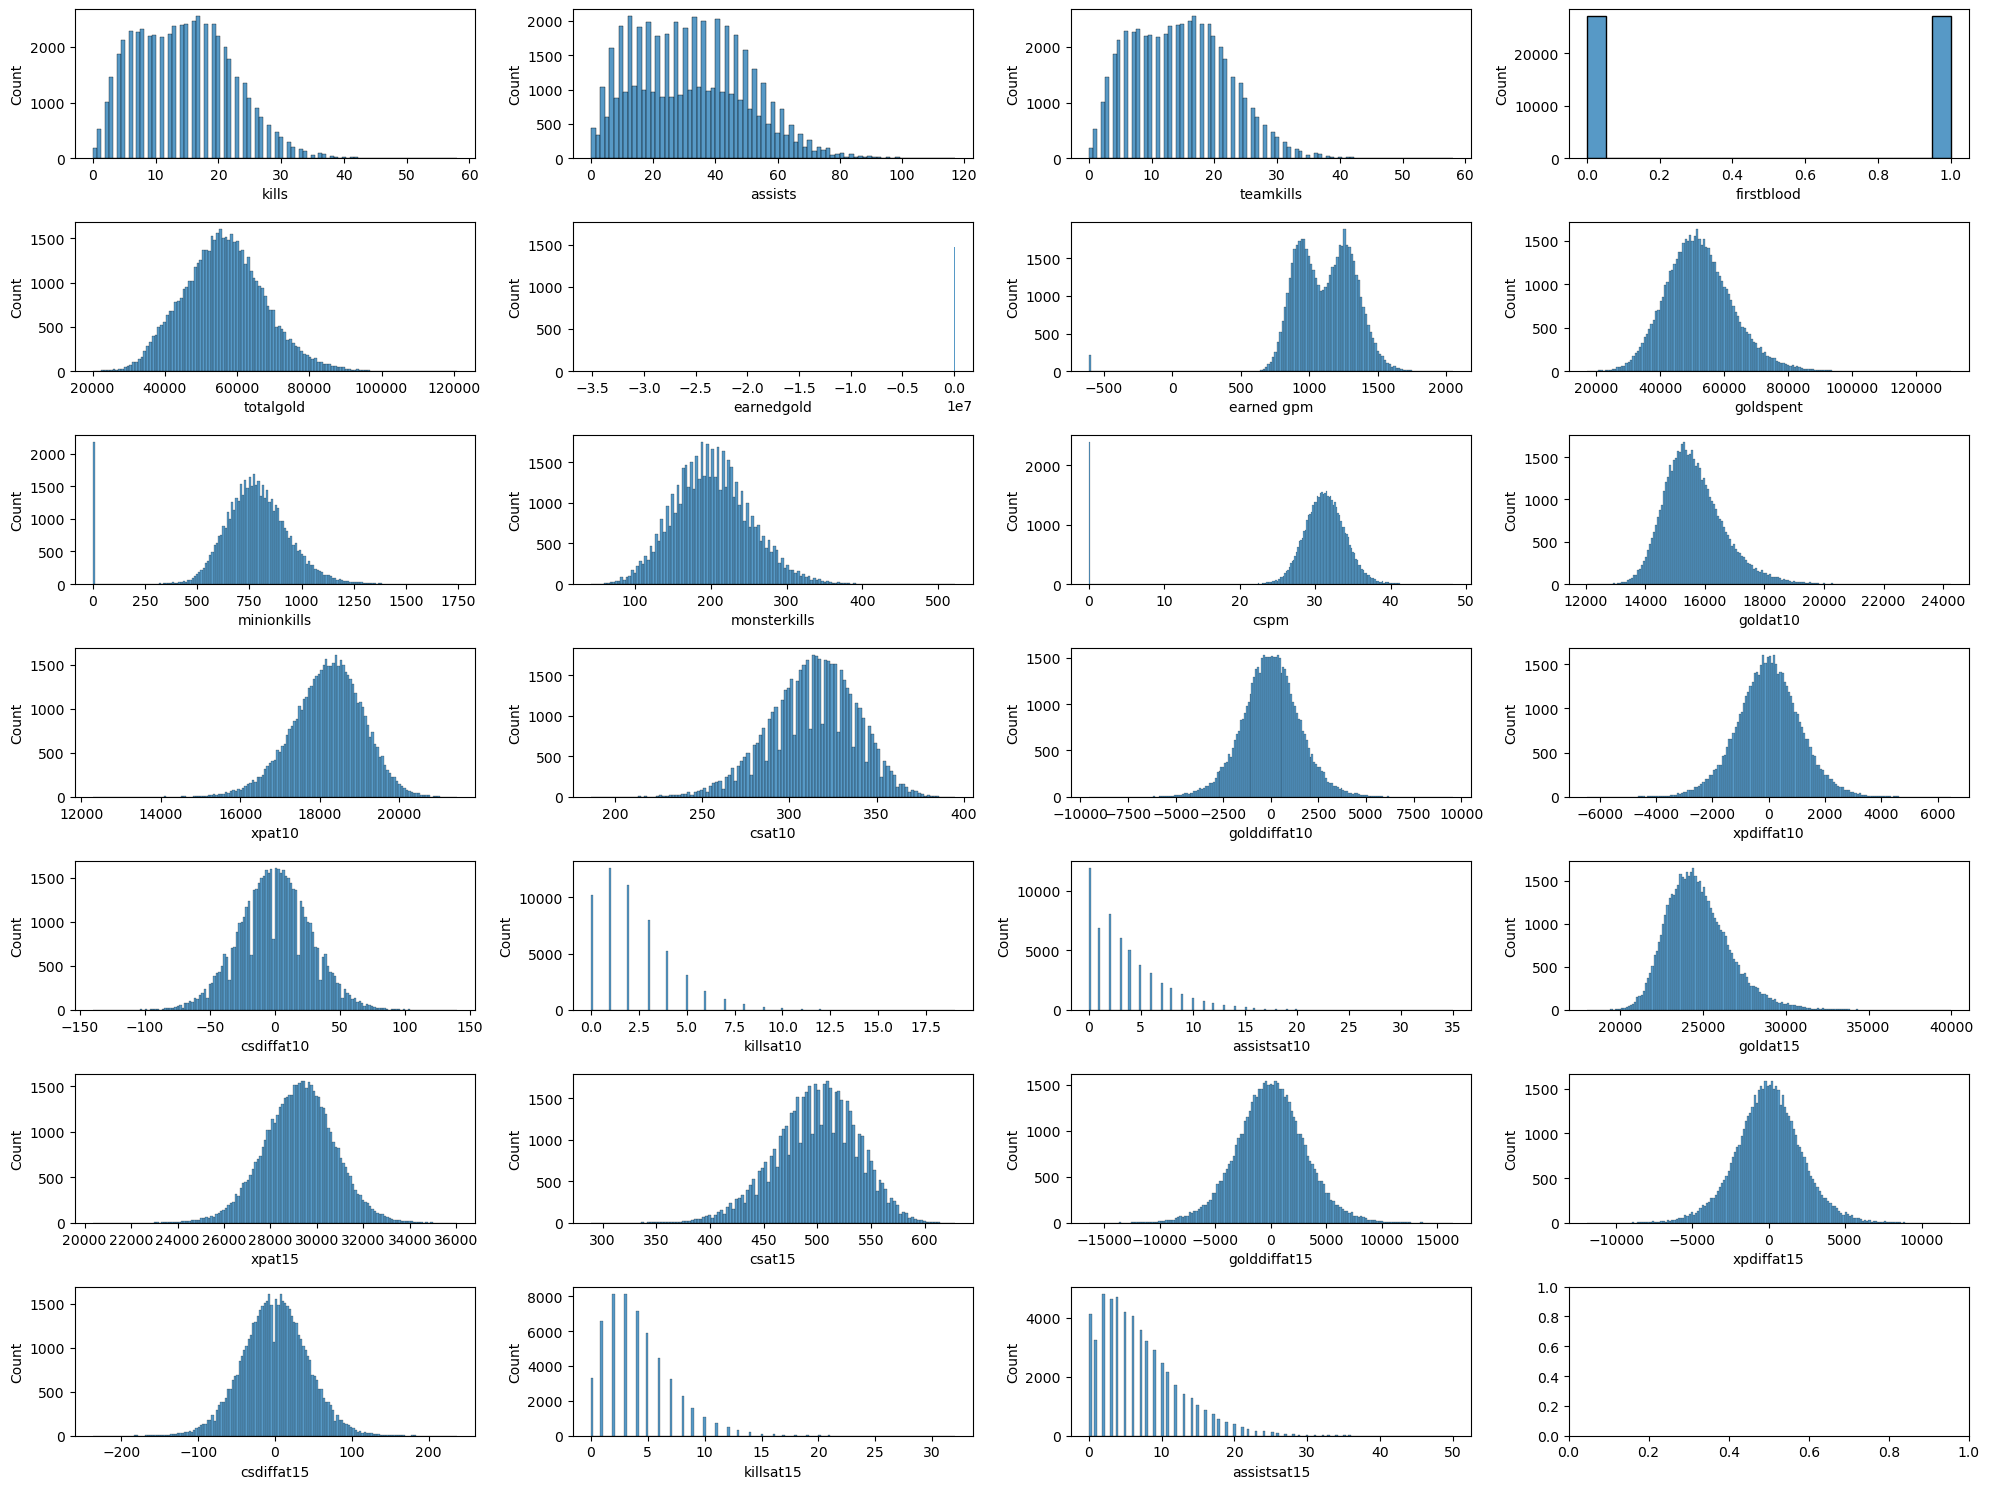

In [ ]:
# visualize distribution of unscaled data in each feature
plot_num = 1

plt.subplots(7,4, figsize=(20,15))

for col in X:
    plt.subplot(7,4,plot_num)
    sns.histplot(X[col])
    plot_num +=1

plt.tight_layout()
plt.show()

---
In the above charts we can see our data has a standard distribution, and we can conclude that we have a normal distribition among our data.

Since we do have normal distribution we can go ahead and use standard scalaer to scale our data and influnce our model and get better accuracy, before that lets splity our data first, and see how our base model looks.

---
## Spliting the data

The next step in our process after checking how our data is distributed, is to split our data. This spliting step consists of : 

In [ ]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 45926 data points.
The test set has 8105 data points.


---
* It should be noted that there is no test size that is perfect for any dataset; spliting our data into training and testing (80/20 is indeed a good starting point). However, we chose to split our data into 85/15, as with 15% we still have 8105 data-points(example) and this amount of data is enough to represent most of the variance.


* We first split our remainder data into two sets and test them, and run our base model on it. Later, we put on our test set on the side and split our remainder set between tran and validation set and begin building our models. We will continue to perfect them throughout this process.
---

In [ ]:
# Baseline logistic regression
# 1.Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print("---Fisrt Model with all Features---")
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

---Fisrt Model with all Features---
Accuracy on remainder set: 0.963724252057658
Accuracy on test set: 0.9649599012954966


---
Wow! Such a great baseline model with a high score of ~96% for both sets. 
Did our Logistic Regression model solve League of Legends? No, that is not the case, we were already expecting to have high accuracy for our base model. Why? Having more gold and experience in the game is one of the highest advantages to  have over an opponent while playing LoL. More gold earned, means more items, which results in more damage output and higher chaces to get the objectives and close the game. 

After the above explanation, we can attest that we have great base model. 

It is time to check the coeficients of our data to make sure there is no data leakage, in order to determine how to create better models and subsequently, look at the LoL from different angle.

---

In [ ]:
# Checking coefficient of our data
baseline_logreg.coef_

array([[ 2.97614462e-04,  7.62134875e-04,  2.97614462e-04,
        -3.98556378e-07,  1.42171783e-03, -8.18516382e-07,
         1.03222682e-02, -1.33673358e-03, -4.69096774e-03,
        -1.07998322e-04,  2.12935003e-05, -1.05517762e-03,
        -4.20296674e-04, -1.19046829e-05,  8.16570290e-05,
         5.30958717e-04,  2.48214615e-05,  6.50531030e-06,
         5.91531222e-06,  3.83000849e-04, -1.24128972e-04,
        -2.05617429e-05,  3.18127508e-05,  4.45511393e-04,
         3.08551596e-05,  1.07072647e-05,  7.60571046e-06]])

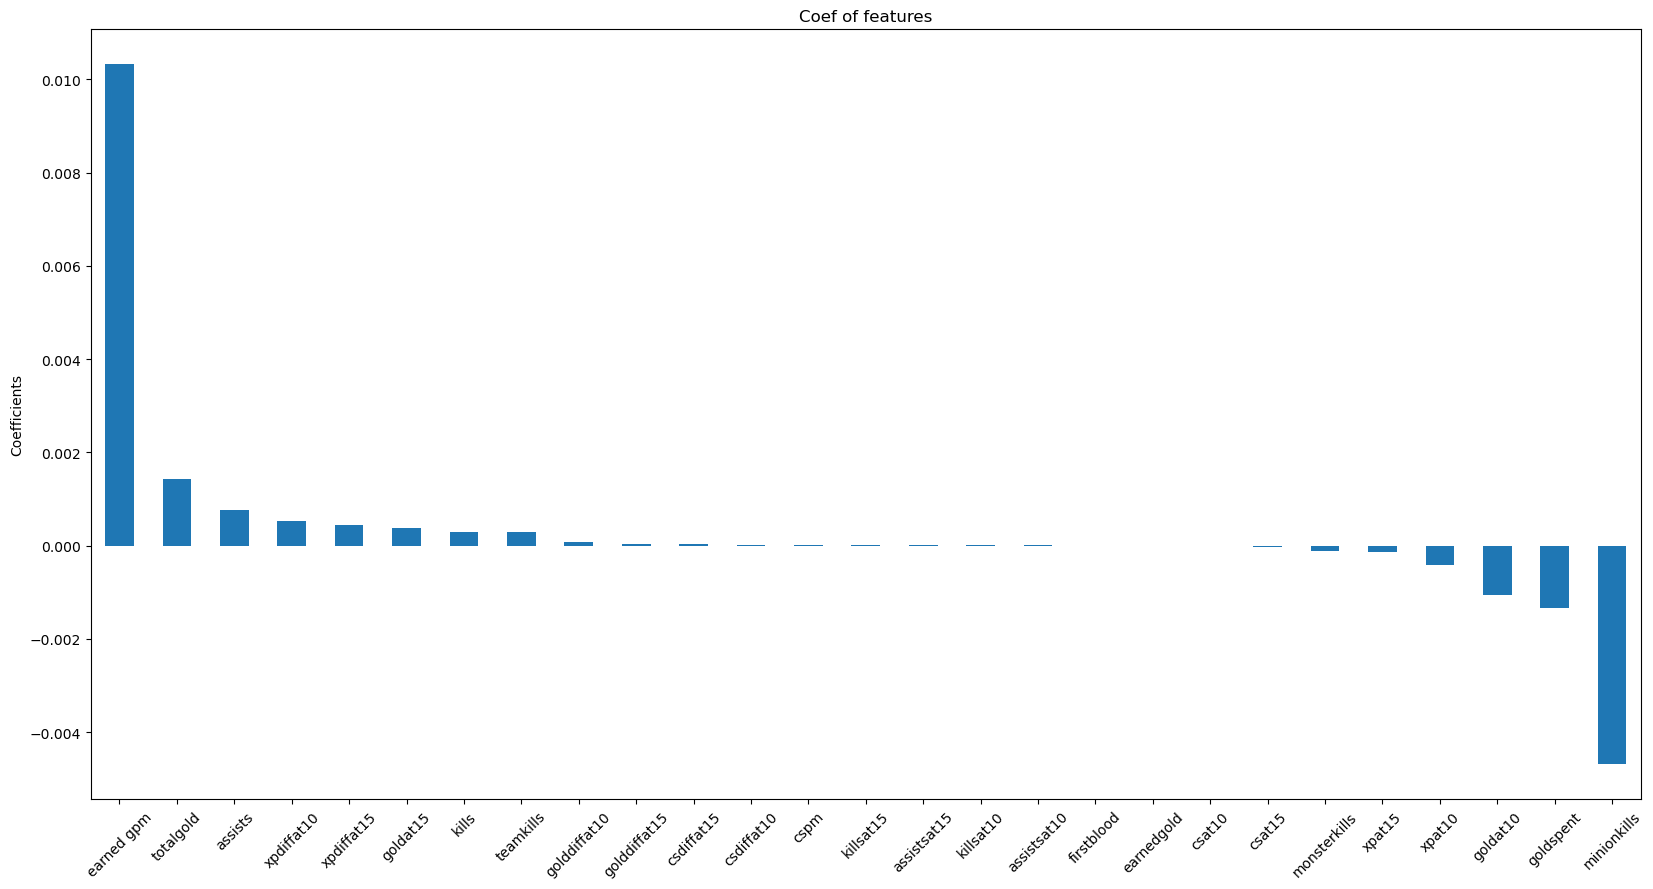

In [ ]:
# Plot the coefficient
coef = pd.DataFrame(
    {"coefficients": baseline_logreg.coef_[0]},
    index=X.columns
).sort_values("coefficients", ascending=False)

coef.plot(kind="bar", figsize=(20,10), legend=False)
plt.title("Coef of features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

--- 
**In the previous graph, we can see that there is not a dominating coefficient / variable, as we were expecting `earned gpm` which stand for gold per minuite and `totalgold`  are two variables we have in our data that doing most of the work on our base model and main reason we have such a high accuracy.**

---

We have now recognized which variables are the main reason for our high accuracy. We will set them aside and proceed to run our model again by removing those two columns.

It is important to mention that we decided to drop some other columns as well `['kills', 'assists', 'teamkills', 'totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills', 'cspm', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15', 'xpdiffat15', 'csdiffat15']` and keep our new models for predicting the game result based on the first 15 minutes of the game just based on information we are going to have on that first 15 minutes. In addition, we also removed the information that could possibly lead our model to being bias, e.g. columns that mentioned an even diffrence of the gold golddifat15. Further below, we will make a simpler model but more accurate and without having some features carry the weight of our model.

---
### Logestic Regression model

Build Logestic Regression model try to predict win percentage based on golf and XP earned on first 15 minutes of the game.

---

In [ ]:
# The independent variable
X = df_one.drop(['teamname', 'result', 'kills', 'assists', 'teamkills',
       'totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'minionkills',
       'monsterkills', 'cspm', 'golddiffat10', 
       'xpdiffat10', 'csdiffat10', 'golddiffat15', 'xpdiffat15', 'csdiffat15'], axis=1)

# The dependent variable 
y = df_one['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (54031, 11)
Shape of y: (54031,)


---
Now that we set our new X and Y variables, we split our data again with our new X.

---

In [ ]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 45926 data points.
The test set has 8105 data points.


In [ ]:
# Baseline logistic regression
# 1.Instantiate and fit to the remainder set
base_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)
base_logreg_unsc_rem = base_logreg.score(X_rem, y_rem)
base_logreg_unsc_test = base_logreg.score(X_test, y_test)
# Print the accuracies
print("---Unscaled data---")
print(f'Accuracy on remainder set: {base_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {base_logreg.score(X_test, y_test)}')

---Unscaled data---
Accuracy on remainder set: 0.6522013674171493
Accuracy on test set: 0.6556446637877853


---
Great! We can notice a significant drop on our accuracy score for both of  our sets. Both sets are ~65%, which means we have a good fit as well. We will validate our sets as mentioned earlier, then scale our data and try to improve our models. 

We will keep these scores in record for later. 

As mentioned earlier, we can set our test set aside and split our remainder of data into a yrain and validation set.

---

In [ ]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.15,stratify=y_rem, random_state=1)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 39037 data points.
The validation set has 6889 data points.


---
For validation test there is no ideal size to use and there is no need for them to be same size but 0.15% seems appropriate, which resulrts in 6,889 examples, that we consider enough to cover all varriances.

Next, let's scale our data and see how it performs. As we previously observed, since we have normal ditribution we are going to use a standard scaler.

Alternatively, we can use a pipline and grid search to find best scaler and hyperparameters for our model.

---

---
### Scaling the data

In [ ]:
### SCALING
# Instantiate
ss = StandardScaler()

# Fit - on the TRAINING DATA
ss.fit(X_rem)

# Transform - all the datasets
X_rem_ss = ss.transform(X_rem)
X_train_ss = ss.transform(X_train)
X_validation_ss = ss.transform(X_val)
X_test_ss = ss.transform(X_test)

In [ ]:
# fit the model on scaled data
# 1.instantiate the model
Validated_logreg = LogisticRegression(random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_train_ss, y_train)

# 3. Score the model
Validated_logreg_ss_train_acc = Validated_logreg.score(X_train_ss, y_train)
Validated_logreg_ss_val_acc = Validated_logreg.score(X_validation_ss,y_val)

print("---Standard Scaler data---")
print(f"Training accuracy: {Validated_logreg_ss_train_acc}")
print(f"Validation accuracy: {Validated_logreg_ss_val_acc}")

---Standard Scaler data---
Training accuracy: 0.7070983938314932
Validation accuracy: 0.6992306575700392


---
As we pointed out earlier, we have a normal distribution in our data, therefore we are going to use Standard Scaler. Very important to mention that the standard scaler is the industry’s go-to algorithm.

After scaling our data, we can see that there has been a slight drop in our accuracy score from 65% to 62%. seems like our base model so far performs better.

Now that we are done with scaling our data, we will now find the best hyperparameters for our model and analyze its performance . For this, let's try simple hyperparameter optimization.

---

In [ ]:
# Let's try a modest range of C values
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000,100000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train_ss, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train_ss, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_validation_ss, y_val))

In [ ]:
# Check the accuracies
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies})

,C value,train accuracy,validation accuracy
0,0.00001,0.691908,0.685441
1,0.00010,0.697825,0.691537
2,0.00100,0.704537,0.697779
3,0.10000,0.707226,0.698215
4,1.00000,0.707098,0.699231
5,10.00000,0.707098,0.699231
6,100.00000,0.707098,0.699231
7,1000.00000,0.707098,0.699231
8,10000.00000,0.707098,0.699231
9,100000.00000,0.707098,0.699231


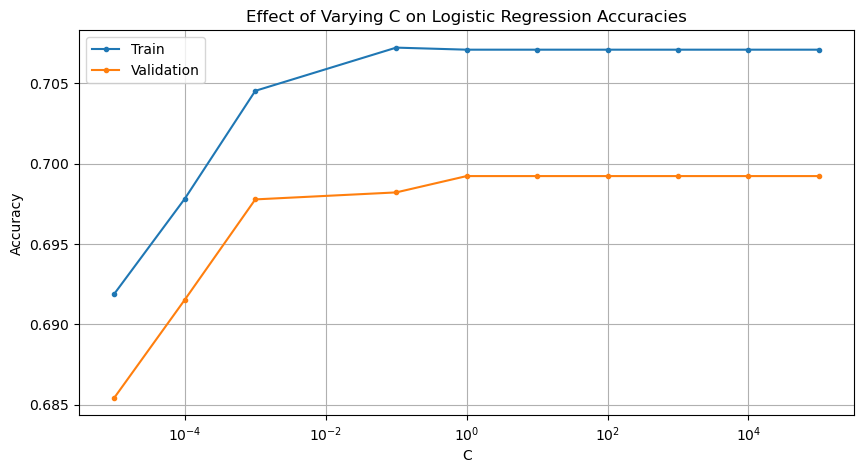

In [ ]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log')  
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

---
The next step is to pick the value of C that yields the highest validation accuracy without the train accuracy being too high so we dont overfit our model. Based on the above table and plot lets choose a C value of 1. Our result is quite significant, the chart becomes straight line so no need to pick a higher number.

We will continue on to build our final model and score it on remainder and test sets.

---

In [ ]:
# 1.instantiate the model
Validated_logreg = LogisticRegression(C=1, random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_rem_ss, y_rem)

# 3. Score the model
Validated_logreg_opt_rem_acc = Validated_logreg.score(X_rem_ss, y_rem)
Validated_logreg_opt_test_acc = Validated_logreg.score(X_test_ss, y_test)

print("---Optimized data---")
print(f"Remainder  accuracy: {Validated_logreg_opt_rem_acc}")
print(f"Test accuracy: {Validated_logreg_opt_test_acc}")

---Optimized data---
Remainder  accuracy: 0.706070635369943
Test accuracy: 0.7004318322023443


---
Following up with the step taken above, we see there is a minor difference between accuracy score between our two tests. We can conclude there is no over fitting in our model and once we optimized our model with C value of 1 we witnessed an improvement in performance of our model and our final model have ~70% test accuracy score, it has ~8% increase in performance compared to scaled data without any optimation and ~5% increase compared to based model.

We are happy with result of our **Logisitic Regresion** Model. Now that we are satisfied with these results, we will compare the performnace of different models.

There are 2 reasons why we say that we are happy with the performance of our model. First, we were able to increase the accuracy by ~8%. Second, since every game can last from minimum 20 minutes to maxium of 45-55 minutes, it would be very hard to predict the game result just based on the first 15 minutes, but the fact that we don't have super high accuracy score, makes our model more accurate and from stand point of the game, more realistic.

---

---
### Confusion Matrix 


We are done building our model, next we are going to use confusion matrix, to evaluate and how our model performed.

We will do this for every single model we are going to build and at the end we will compare their performances.

---

In [ ]:
# Get class predictions
y_pred = Validated_logreg.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,2874,1178
True Defeat,1250,2803


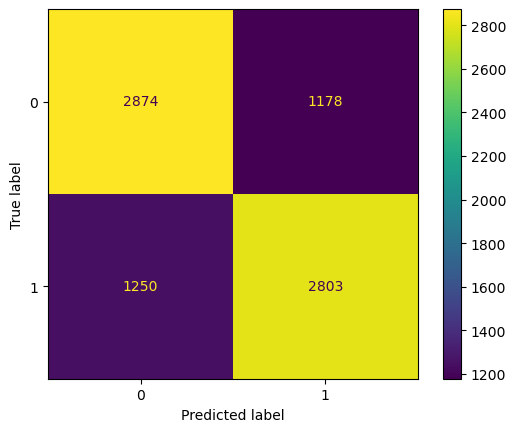

In [ ]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(Validated_logreg, X_test_ss, y_test);

*** In our confusion matrix for our Logistic Regresion model we can see that out of  4,052  games won, 2874(70.92%) games were correctly classified and 1,178 were incorrectly classified as  defeat but in fact they are the games have been won.

Also just to clarify are top row is the games won and bottom row is games lost we have tottal of 4,052 games in tottal won  and 4,053 games lost. we see a balance number between the number were correctly and incorrectly classified, and it does makes sense that we have such a high incorrect classification since we are trying to predict the game results solely based on the gold and experinced earned on the first 15 minutes of the game.

Conclusion is that our model classified ~71% our data correctly for games won, and ~69.15% of loses were classified correctly. we will keep this mumber on the side and once we finished our model we can compare to each other and see which model performs better. ***

## Decesion Tree Model

---
Next, we move our focus towards the decision tree model. 

The Decision Tree classifiers do not require data to be scaled as they are not sensitive to variance.

---

In [ ]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

DT_model_rem_unscb = DT_model.score(X_rem, y_rem)
DT_model_test_unscb = DT_model.score(X_test,y_test)
# Score the model
# Evaluate its classification accuracy 
print("---Unscaled data---")
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_rem, y_rem)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

---Unscaled data---
The TRAIN classification accuracy is:  0.6947262988285503
The TEST classification accuracy is:  0.6927822331893893


---
Based on the above score, so far seems like our decesion tree base model has better scores than our Logistic base model. Keep in my mind this is model just with a max depth of one.

We will cheack and evaluate the score to see if we can let our tree grow to max.

---

In [ ]:
# Instantiate the model
DT_model = DecisionTreeClassifier(random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

# Score the model
# Evaluate its classification accuracy 
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_rem, y_rem)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.6114743985194324


In [ ]:
DT_model.get_depth()

47

---
This of couse is going to be an overfit model, but we would like to see the scores and check how far our tree grows. The result? The growth depth of our Decesion Tree model is 45.

After the previous setup, we will find the best `max_depth` for our model, in order to find out the best performnace point in our model.

We now know how big our tree will grow. In the next step we will find the most optimized *max_depth* for our Decesion Tree model.

---

In [ ]:
OP = np.arange(1,47)
for depth in OP:

    # 1. Instantiate - DECISION STUMP
    DT_model = DecisionTreeClassifier(max_depth=depth)

    # 2. Fit
    DT_model.fit(X_train_ss, y_train)

    # 3. Score - on both train and validation set
    train_score = DT_model.score(X_train_ss, y_train)
    validation_score = DT_model.score(X_validation_ss, y_val)
    
    print(f'Max depth: {depth}, Train score:{train_score}, Validation score:{validation_score}')

Max depth: 1, Train score:0.6956989522760458, Validation score:0.6892146900856437
Max depth: 2, Train score:0.6956989522760458, Validation score:0.6892146900856437
Max depth: 3, Train score:0.6956989522760458, Validation score:0.6892146900856437
Max depth: 4, Train score:0.6994389937751364, Validation score:0.6918275511685296
Max depth: 5, Train score:0.7020775162025771, Validation score:0.6918275511685296
Max depth: 6, Train score:0.7060993416502293, Validation score:0.6938597764552185
Max depth: 7, Train score:0.7129133898609012, Validation score:0.6934242996080708
Max depth: 8, Train score:0.7212132079821708, Validation score:0.6938597764552185
Max depth: 9, Train score:0.7288213745933345, Validation score:0.6892146900856437
Max depth: 10, Train score:0.7410149345492738, Validation score:0.6835534910727247
Max depth: 11, Train score:0.7537464456797397, Validation score:0.6797793583974452
Max depth: 12, Train score:0.7689627789020673, Validation score:0.675424589925969
Max depth: 13,

In [ ]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc = []
val_acc = []

# Loop through the depths
for max_depth in depths:
    
    # Instantiate the model 
    DT_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model 
    DT_model.fit(X_train, y_train)
    
    # Score the model 
    train_acc.append(DT_model.score(X_train, y_train))
    val_acc.append(DT_model.score(X_val, y_val))
    
stop = time.time()
runtime_DT_model = stop-start
print(f"Runtime: {round(runtime_DT_model,2)} seconds")

Runtime: 54.92 seconds


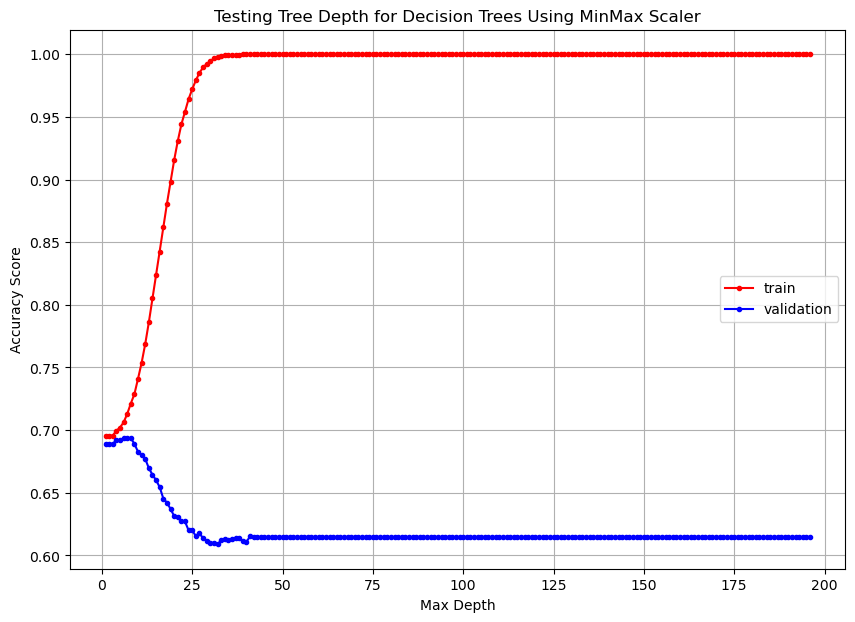

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(10, 7))
plt.plot(depths, train_acc, c='red', label='train', marker='.')
plt.plot(depths, val_acc, c='blue', label='validation', marker='.')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Testing Tree Depth for Decision Trees Using MinMax Scaler')
plt.grid()
plt.legend()
plt.show()

---
We going to select `max_depth=8` as the model start to overfit beyond that point, and we can see our validation set is starts to drop significantly after thatpoint.

---

In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=8, random_state=1)

# Fit the model 
DT_model.fit(X_rem, y_rem)

# Store accuracy scores
DT_model_train_unsc = DT_model.score(X_rem, y_rem)
DT_model_test_unsc = DT_model.score(X_test, y_test)

# Score the model 
print("---Unscaled data---")
print(f"Train Accuracy: {DT_model_train_unsc}")
print(f"Test Accuracy: {DT_model_test_unsc}")

---Unscaled data---
Train Accuracy: 0.7160649740887515
Test Accuracy: 0.6915484268969772


---
Based on accuracy score we can conclude that our Decesion Tree model so far has been better than our Logistic Regression model. Seems like our Decesion Tree would perform better, but we can't know for certain until we see the end result.

In addition, we will try and fit our Decesion Tree into scaled data as well;

---

In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=8, random_state=1)

# Fit the model 
DT_model.fit(X_train,y_train)

# Store accuracy scores
DT_model_train = DT_model.score(X_train, y_train)
DT_model_test = DT_model.score(X_val, y_val)

# Score the model 
print(f"Train Accuracy: {DT_model_train}")
print(f"Test Accuracy: {DT_model_test}")

Train Accuracy: 0.7213156748725568
Test Accuracy: 0.6934242996080708


In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=8, random_state=1)

# Fit the model 
DT_model.fit(X_train_ss,y_train)

# Store accuracy scores
DT_model_train_ss = DT_model.score(X_train_ss, y_train)
DT_model_test_ss = DT_model.score(X_validation_ss, y_val)

# Score the model 
print("---Standard Scaler data---")
print(f"Train Accuracy: {DT_model_train_ss}")
print(f"Test Accuracy: {DT_model_test_ss}")

---Standard Scaler data---
Train Accuracy: 0.7213156748725568
Test Accuracy: 0.6937146175061693


In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=8, random_state=1)

# Fit the model 
DT_model.fit(X_rem_ss,y_rem)

# Store accuracy scores
DT_model_rem_optg = DT_model.score(X_rem_ss, y_rem)
DT_model_test_optg = DT_model.score(X_test_ss, y_test)

# Score the model 
print("---Optimized data---")
print(f"Train Accuracy: {DT_model_rem_optg}")
print(f"Test Accuracy: {DT_model_test_optg}")

---Optimized data---
Train Accuracy: 0.7160649740887515
Test Accuracy: 0.6915484268969772


---
We can notice that in our entire traning our decesion tree model performance resumed almost the same, and our foinal and best model in Decesion Tree has an accuracy of ~69%. Our model looks good, doesn't seem like an overfit. We will keep these number in record, so we can compare them in the end with our other models.

---

## Confusion Matrix for our Decesion Tree

In [ ]:
# Get class predictions
y_pred = DT_model.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,2642,1410
True Defeat,1090,2963


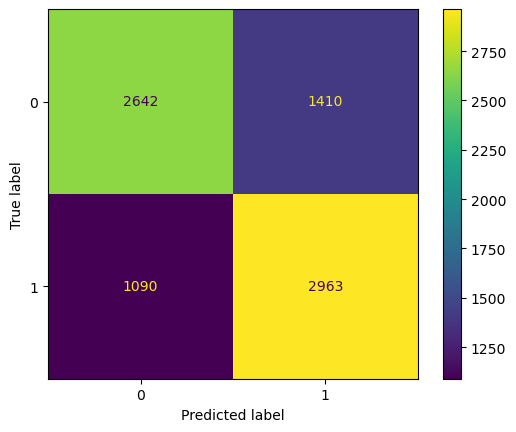

In [ ]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_model, X_test_ss, y_test);

*** Now lets see the numbers for our confusion matrix for our Decesion Tree model, 
 * 2,642( ~65.20 %) games were correctly classified for games won, 
 * and 2,963(~73.10%) games were correctly classified for matches lost.

we wont go into details and compare our decesion Tree model performance with our logistic regresion model yet, lets evalutae all of our models performance once we have them all at end of the report and discuss it in detail. ***

---
## XGBoosting

---
Next we have XG Boosting classifier, we will follow exact same steps we did for our pervios two model, and in the end of the report compare and evalute our models.

---

In [ ]:
# Base model
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_rem, y_rem)

# Store accuracy scores
XGB_model_rem_unsc = XGB_model.score(X_rem, y_rem)
XGB_model_test_unsc = XGB_model.score(X_test, y_test)

# Score the model 
print("---Unscaled data---")
print(f"Remainder Accuracy: {XGB_model_rem_unsc}")
print(f"Test Accuracy: {XGB_model_test_unsc}")

---Unscaled data---
Remainder Accuracy: 0.7624657057004747
Test Accuracy: 0.6959901295496607


In [ ]:
# Unscaled model on train and validation set
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_train, y_train)

# Store accuracy scores
XGB_model_train_unsc = XGB_model.score(X_train, y_train)
XGB_model_val_unsc = XGB_model.score(X_val, y_val)

# Score the model 
print("---Unscaled data---")
print(f"Train Accuracy: {XGB_model_train_unsc}")
print(f"Test Accuracy: {XGB_model_val_unsc}")

---Unscaled data---
Train Accuracy: 0.7742142070343521
Test Accuracy: 0.6966177964871534


In [ ]:
# scaled data
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_train_ss, y_train)

# Store accuracy scores
XGB_model_train_ss = XGB_model.score(X_train_ss, y_train)
XGB_model_val_ss = XGB_model.score(X_validation_ss, y_val)

# Score the model 
print("---Standard Scaler data---")
print(f"Train Accuracy: {XGB_model_train_ss}")
print(f"Test Accuracy: {XGB_model_val_ss}")

---Standard Scaler data---
Train Accuracy: 0.7742142070343521
Test Accuracy: 0.6966177964871534


In [ ]:
# Bulidng parameter and finding hyperparameter for our XGBoost
XGB_model = XGBClassifier(n_jobs=-1)

param_grid = {'n_estimators': np.arange(1, 200, 10), 'max_depth': np.arange(1, 10)}
grid_xgb = GridSearchCV(XGB_model, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(X_rem_ss, y_rem)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [ ]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"]
})

results_df.head()

,n_estimators,max_depth,mean_score
0,1,1,0.694639
1,11,1,0.700300
2,21,1,0.704089
3,31,1,0.704024
4,41,1,0.704699


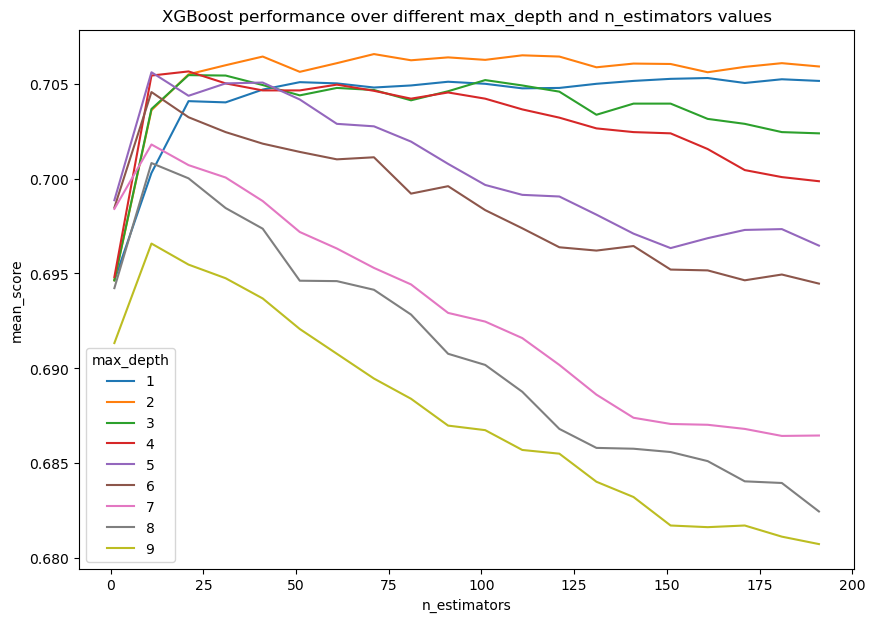

In [ ]:
# Plot to find best max_depth for XGBoost
plt.figure(figsize=(10, 7))
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.title("XGBoost performance over different max_depth and n_estimators values")
plt.show()

In [ ]:
# getting best parameters for our XGboost
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=71, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

---
As we can see in above *max_depth* 1 and 2 are kind of going toe to toe, but it seems like `max_depth=2` do have slight edge and by checking our best estimator we see that it says the exat samething and confrims at `max_depth=2`our model would optimized the most.

Now lets instantite our final model for our XGBosst Model.

---

In [ ]:
# Instantiate the model 
XGB_model = XGBClassifier(max_depth=2, random_state=1,)

# Fit the model 
XGB_model.fit(X_rem_ss, y_rem)

# Store accuracy scores
XGB_model_rem_opt = XGB_model.score(X_rem_ss, y_rem)
XGB_model_test_opt = XGB_model.score(X_test_ss, y_test)

# Score the model 
print("---Optimized data---")
print(f"Remainder Accuracy: {XGB_model_rem_opt}")
print(f"Test Accuracy: {XGB_model_test_opt}")

---Optimized data---
Remainder Accuracy: 0.7112311109175631
Test Accuracy: 0.699691548426897


---

As Mentioned earleier we will leave the comparison of the result between models for their test accuracy for the end of the report.

---

### Confusion Matrix for  XGBoost

In [ ]:
# Get class predictions
y_pred = grid_xgb.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,2880,1172
True Defeat,1276,2777


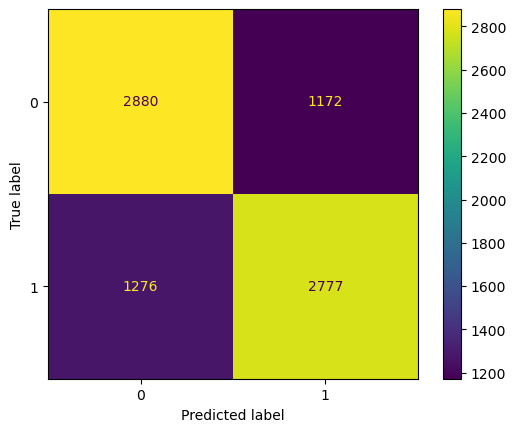

In [ ]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(grid_xgb, X_test_ss, y_test);

Lets see how are the number look for our XGBoost model,

* 2,880( ~71.07 %) games were correctly classified for games won


* 2,777(~68.51%) games were correctly classified for matches lost

---
## Secondry objective affects on the game result


---
So far we have created 2 models for our first problem based on our first dataframe, which only contains all sort of gold income and exparience in the game. We had fairly good result with Test a accuracy Score of ~70% for our Logistic Regression model and our Decesion Tree with ~69% test Accuracy score.

Now that we are done with builidng models for our first question based on `Gold&EXP`, let's look at different aspects that can change the outcome of the game or give an upperhand to the team who was losing and now have a chance to become victorious.

That being said, we will proceed to focus on different metrics of the game, such as Secondary Objectives (`Baron Buff, Dragons, Towers`). Lets take these metrics into consideration and see the performance of our models.

---

---
### Logistic Regression 

--- 
Same as our first model that we created based on `Gold&EXP` before, we set our independent and dependent variables.
First we will drop `teamname`,`earned gpm`,`totalgold` since they have high coefecient and do most of the job on our model.

We will also drop all the columns that we used for our first model as we want to focus our analysis only based on the objectives we do not want their influence in our model.

---

In [ ]:
# The independent variables 
X = df_two.drop(['teamname', 'result', 'kills', 'assists', 'teamkills',
       'firstblood', 'controlwardsbought', 'totalgold',
       'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills',
       'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10',
       'csdiffat10', 'killsat10', 'assistsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15'], axis=1)

# The dependent variable 
y = df_two['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (54031, 21)
Shape of y: (54031,)


In [ ]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 45926 data points.
The test set has 8105 data points.


In [ ]:
# Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

OBJ_rem_unsc = baseline_logreg.score(X_rem, y_rem)
OBJ_test_unsc = baseline_logreg.score(X_test, y_test)
# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.9609589339372033
Accuracy on test set: 0.965206662553979


---
Seems like we have the exact same problem as earlier and there are some features that have higher coefficient and appear to be dominating the results, and would be a misleading information. 

As we see above, we would have a high accuracy of ~96% on a **base model**, but is this really an accurate information? It appears to be that some of these features are leading more towards the final results of the game while on the other hand, we are trying to base our model just on the resources and buffs of the game. Let's take a look into coefficients and plot to have better understanding of the influence of our features, and after we will discuss the previously mentioned aspects in more details.

---

In [ ]:
# just checking for coefficients same as our first model
baseline_logreg.coef_

array([[ 0.0898227 ,  0.22541916,  0.32715931,  0.15999829,  0.09306563,
        -0.03361446,  0.13254137, -0.08141397,  0.1214686 ,  0.05310506,
        -0.06488615,  0.07538114, -0.23668426,  1.09309262, -0.84306851,
        -0.04486903,  1.61343413,  0.38712384, -0.35949332, -0.0513594 ,
        -0.30376152]])

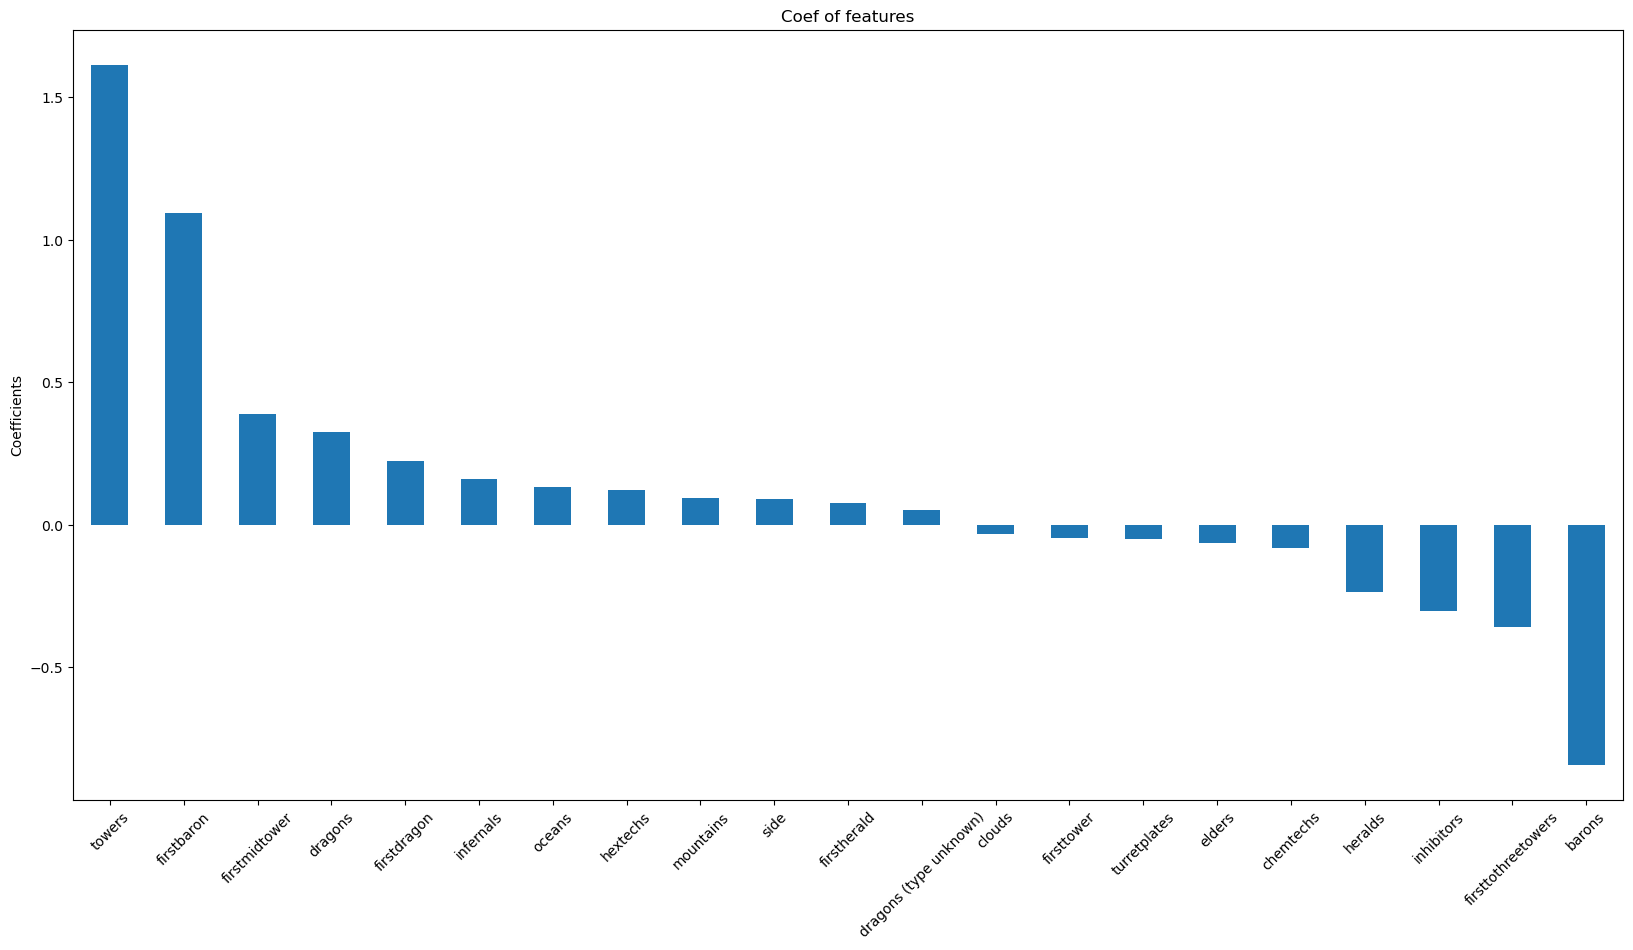

In [ ]:
# Plot the coefficient
coef = pd.DataFrame(
    {"coefficients": baseline_logreg.coef_[0]},
    index=X.columns
).sort_values("coefficients", ascending=False)

coef.plot(kind="bar", figsize=(20,10), legend=False)
plt.title("Coef of features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

---
During our observation we can tell there is big weight being lifted by `towers`,`firstmidtower`,`firsttothreetowers`,`inhibitors`, `firstbaron` and `barons`. We can not drop `barons` column since it is one of the feature that we are building and basing our second question on, also it is totally understandable and acceptable that baron have this coefficient since is one the 2 strongest buff in the game and even if a team is losing, it can give them the upper hand to change the outcome of the game.

We definitely wanted to analysis the game results based on turrets as well as they are considered a secondary objective, but we made the decesion to drop them and keep them out of equation, and focus our model solely on other resources like Baron, Dragons, Elder Dragon and Rift Herald.

I have also included this in our analysis which, we will go more into detail later in the report.

Now we will drop the columns and see if there is any difference in the performance of our model.

---

In [ ]:
# The independent variables 
X = df_two.drop(['teamname', 'result', 'kills', 'assists', 'teamkills',
       'firstblood', 'controlwardsbought', 'totalgold',
       'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills',
       'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10',
       'csdiffat10', 'killsat10', 'assistsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15','firstbaron','towers','inhibitors','firstmidtower','firsttothreetowers'], axis=1)

# The dependent variable 
y = df_two['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (54031, 16)
Shape of y: (54031,)


In [ ]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 45926 data points.
The test set has 8105 data points.


In [ ]:
# Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

OBJ_rem_unsc = baseline_logreg.score(X_rem, y_rem)
OBJ_test_unsc = baseline_logreg.score(X_test, y_test)
# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.8675477942777512
Accuracy on test set: 0.8663787785317705


---
Following up, we do have high accuracy and good fit model,  also we can confidently say this model is not being influenced with the other features we had in our base model that we ran with a 96% of the accuracy. 

Now that we have been cleaned the data and kept the features that we need we can start scaling and optimizing our logistic regression model and continue with our analysis and comparing their performances.

We will follow same steps :

1. split train data into remainder/test set and train/validation set

2. Scale our data 

3. Optimize the data and fit our final data

4. Creat confusion matrix for each model

please note as we are exact same models and steps as we did for our initial question of intrest, we will reduce amount of explanation during steps taken moving forward, howevr that does not mean we are not going to eplain them, we will simply go into detail and camparison once we are done building all our model.

---

In [ ]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.15,stratify=y_rem, random_state=1)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 39037 data points.
The validation set has 6889 data points.


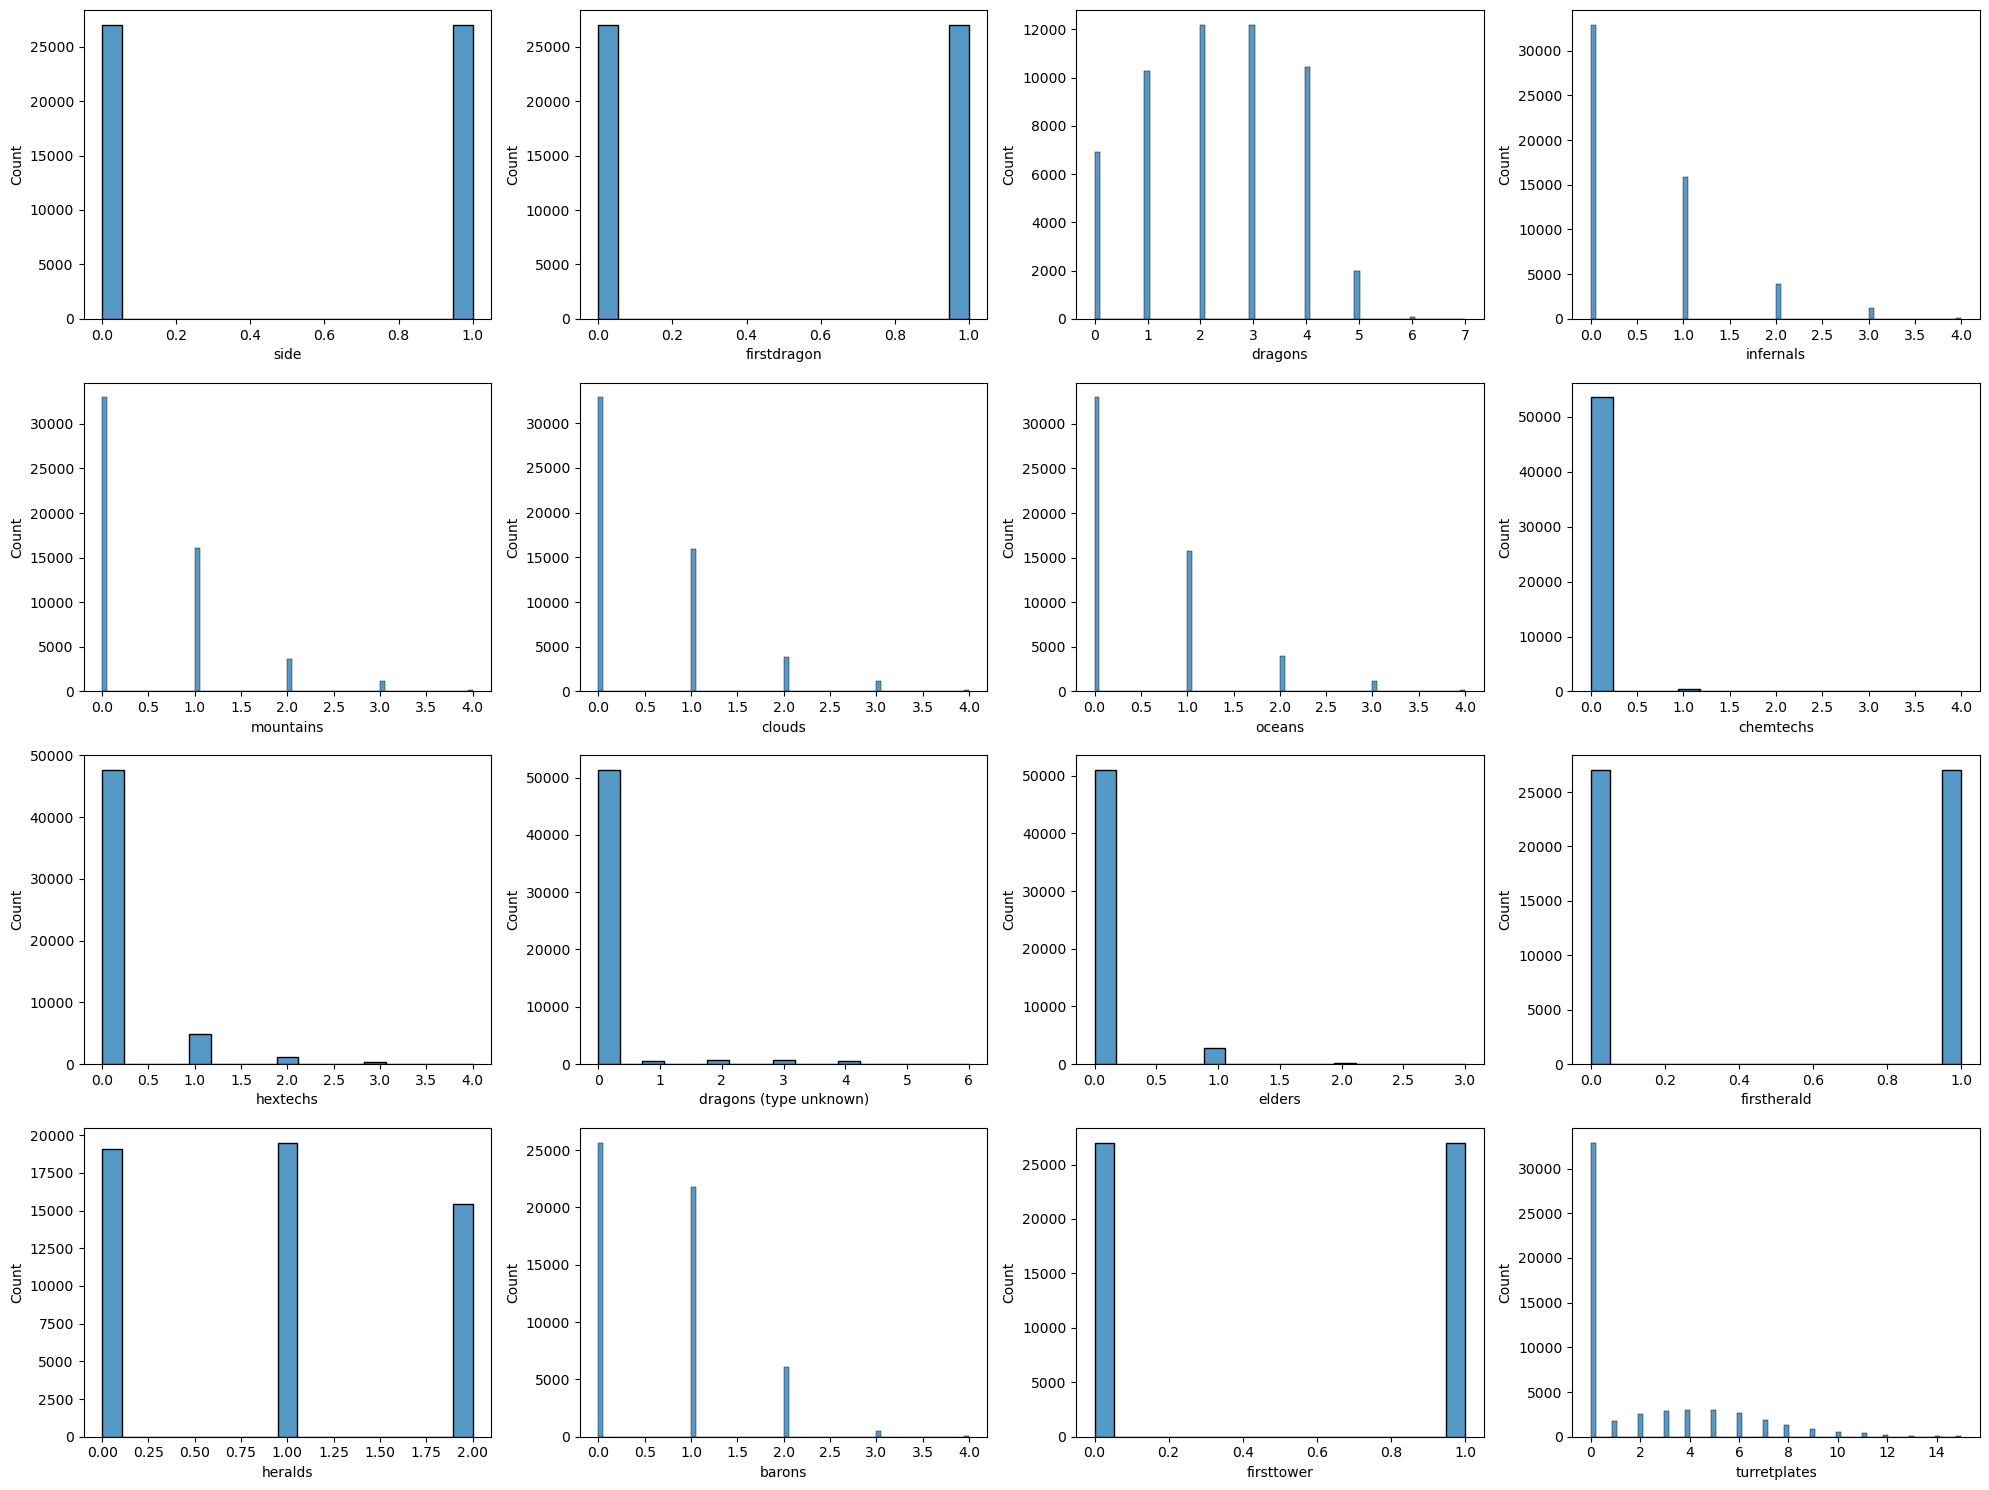

In [ ]:
# visualize distribution of unscaled data in each feature
plot_num = 1

plt.subplots(4,4, figsize=(20,15))

for col in X:
    plt.subplot(4,4,plot_num)
    sns.histplot(X[col])
    plot_num +=1

plt.tight_layout()
plt.show()

---
We can see we do not have normal distribution anymore and we can say it looks pretty imbalance. There is gap between our data distribution and some are skew to left, therefore in this case we will choose MinMax scaler as it works better with non-normal distibution.

Also another reason why we chose MinMax Scaler is that it prevents certain features with large scales from washing out the impact of other features, which is very important in our case since we are simply going to compare different resources of the game and their impact on the flow of the game

---

In [ ]:
### SCALING
# Instantiate
mm = MinMaxScaler()

# Fit - on the TRAINING DATA
mm.fit(X_rem)

# Transform - all the datasets
X_rem_mm = mm.transform(X_rem)
X_train_mm = mm.transform(X_train)
X_validation_mm = mm.transform(X_val)
X_test_mm = mm.transform(X_test)

In [ ]:
# fit the model on scaled data
# 1.instantiate the model
Validated_logreg = LogisticRegression(random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_train_mm, y_train)

# 3. Score the model
Validated_logreg_mm_train_acc = Validated_logreg.score(X_train_mm, y_train)
Validated_logreg_mm_val_acc = Validated_logreg.score(X_validation_mm,y_val)

print("---MinMax Scaler data---")
print(f"Training accuracy: {Validated_logreg_mm_train_acc}")
print(f"Validation accuracy: {Validated_logreg_mm_val_acc}")

---MinMax Scaler data---
Training accuracy: 0.8657683735942824
Validation accuracy: 0.8741471911743359


In [ ]:
# Let's try a modest range of C values to optimize our model
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000,100000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train_mm, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train_mm, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_validation_mm, y_val))

In [ ]:
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies})

,C value,train accuracy,validation accuracy
0,0.00001,0.708354,0.713456
1,0.00010,0.723391,0.729133
2,0.00100,0.810692,0.812309
3,0.10000,0.865051,0.873567
4,1.00000,0.865768,0.874147
5,10.00000,0.866178,0.873857
6,100.00000,0.866127,0.873857
7,1000.00000,0.866127,0.873857
8,10000.00000,0.866127,0.873857
9,100000.00000,0.866127,0.873857


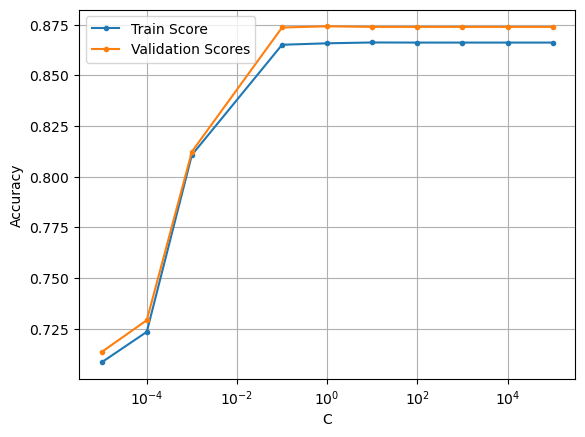

In [ ]:
# plot the C values
plt.figure()
plt.plot(c_values, train_accuracies,label="Train Score",marker='.')
plt.plot(c_values, validation_accuracies,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show();

---
For our C value here its really close between 0.1 and 1, but at C value = 1 we do have slight edge and if go back to above table we see slightly better performance and less gap between train and validation sets at `C Value=1`, Lets put this into our test and fit our final model for Logistic Regression;

---

In [ ]:
# Final optimized model
# 1.instantiate the final  model
Validated_logreg = LogisticRegression(C=1, random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_rem_mm, y_rem)

# 3. Score the model
Validated_logreg_opt_rem_acc_obj = Validated_logreg.score(X_rem_mm, y_rem)
Validated_logreg_opt_test_acc_obj = Validated_logreg.score(X_test_mm, y_test)

print("---Optimized data---")
print(f"Remainder st accuracy: {Validated_logreg_opt_rem_acc_obj}")
print(f"Test accuracy: {Validated_logreg_opt_test_acc_obj}")

---Optimized data---
Remainder st accuracy: 0.8674389234856072
Test accuracy: 0.8660086366440469


---
### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = Validated_logreg.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3461,591
True Defeat,495,3558


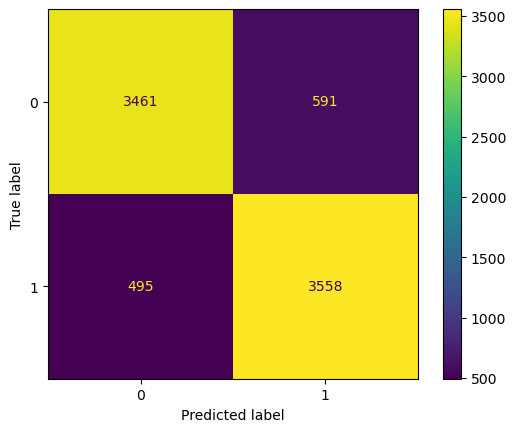

In [ ]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(Validated_logreg, X_test_mm, y_test);

Logistic Regresiion confusion matrix for our second question

* 3,706( ~91.46 %) games were correctly classified for games won,


* 2,971(~73.30%) games were correctly classified for matches lost.

---
### Decesion Tree

---
Lets try Decesion Tree model on our second dataframe that contain both Objectives and golds/EXP earned on first 15 mins.

---

In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

# Score the model
# Evaluate its classification accuracy 
print("---Unscaled data---")
print(f"Remainder accuracy:  {DT_model.score(X_rem, y_rem)}")
print(f"Test accuracy:  {DT_model.score(X_test,y_test)}")

---Unscaled data---
Remainder accuracy:  0.8490179854548622
Test accuracy:  0.8539173349784084


In [ ]:
# Instantiate the model
DT_model = DecisionTreeClassifier(random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

# Score the model
DT_model_rem_unsc = DT_model.score(X_rem, y_rem)
DT_model_test_unsc = DT_model.score(X_test,y_test)
# Evaluate its classification accuracy 
print(f"Remainder accuracy :  {DT_model_rem_unsc}")
print(f" TEST accuracy :  {DT_model_test_unsc}")

Remainder accuracy :  0.9276009232243174
 TEST accuracy :  0.8270203578038248


In [ ]:
# how deep our tree would grow
DT_model.get_depth()

30

In [ ]:
# finding best max_depth
OP = np.arange(1,31)
for depth in OP:

    # 1. Instantiate - DECISION STUMP
    DT_model = DecisionTreeClassifier(max_depth=depth)

    # 2. Fit
    DT_model.fit(X_train_mm, y_train)

    # 3. Score - on both train and test
    train_score = DT_model.score(X_train_mm, y_train)
    validation_score = DT_model.score(X_validation_mm, y_val)
    
    print(f'Max depth: {depth}, Train score:{train_score}, Validation score:{validation_score}')

Max depth: 1, Train score:0.8482465353382688, Validation score:0.853389461460299
Max depth: 2, Train score:0.8574429387504162, Validation score:0.8610828857599071
Max depth: 3, Train score:0.8670235930015114, Validation score:0.8725504427347947
Max depth: 4, Train score:0.8680482619053719, Validation score:0.8740020322252867
Max depth: 5, Train score:0.8690216973640392, Validation score:0.8742923501233851
Max depth: 6, Train score:0.8721981709660066, Validation score:0.8773406880534185
Max depth: 7, Train score:0.8743499756641135, Validation score:0.8771955291043693
Max depth: 8, Train score:0.8756308117939391, Validation score:0.8754536217157788
Max depth: 9, Train score:0.8788585188410994, Validation score:0.8751633038176804
Max depth: 10, Train score:0.8823680098368215, Validation score:0.8745826680214835
Max depth: 11, Train score:0.8862361349488946, Validation score:0.8724052837857454
Max depth: 12, Train score:0.890616594512898, Validation score:0.8683408332123675
Max depth: 13, 

In [ ]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train_mm.shape[0])))

# Empty lists to append to
train_acc = []
val_acc = []

# Loop through the depths
for max_depth in depths:
    
    # Instantiate the model 
    DT_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model 
    DT_model.fit(X_train_mm, y_train)
    
    # Score the model 
    train_acc.append(DT_model.score(X_train_mm, y_train))
    val_acc.append(DT_model.score(X_validation_mm, y_val))
    
stop = time.time()
runtime_DT_model = stop-start
print(f"Runtime: {round(runtime_DT_model,2)} seconds")

Runtime: 13.68 seconds


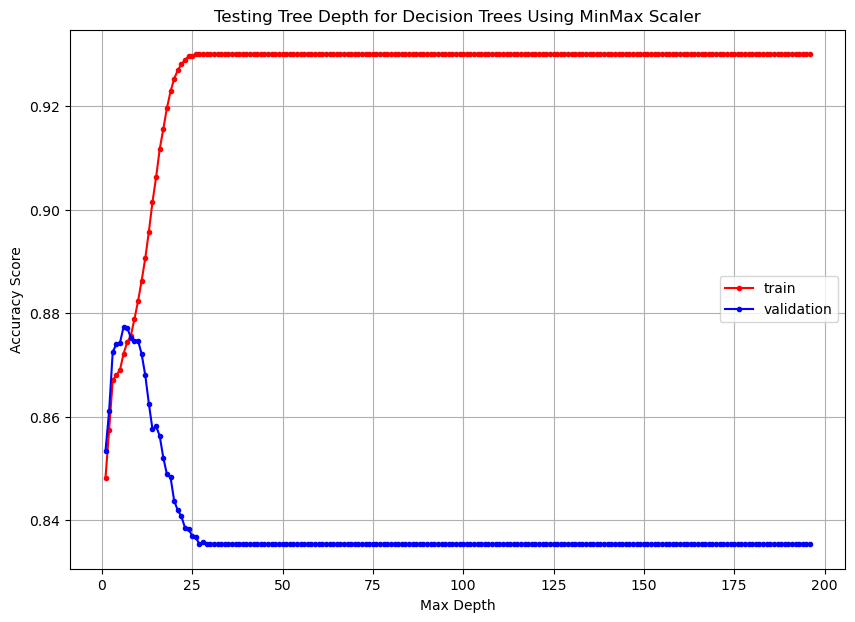

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(10, 7))
plt.plot(depths, train_acc, c='red', label='train', marker='.')
plt.plot(depths, val_acc, c='blue', label='validation', marker='.')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Testing Tree Depth for Decision Trees Using MinMax Scaler')
plt.grid()
plt.legend()
plt.show()

---
 same as before As we can see after `Max_depth=6` we witnessing drop of our validation set, so we will choose `max_depth=6` to optimize our model.
 
 ---

In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_rem, y_rem)

# Store accuracy scores
DT_model_train = DT_model.score(X_rem, y_rem)
DT_model_test = DT_model.score(X_test, y_test)

# Score the model 
print("---Unscaled data---")
print(f"Train Accuracy: {DT_model_train}")
print(f"Test Accuracy: {DT_model_test}")

---Unscaled data---
Train Accuracy: 0.8732743979445194
Test Accuracy: 0.8727945712523134


In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_train,y_train)

# Store accuracy scores
DT_model_train = DT_model.score(X_train, y_train)
DT_model_test = DT_model.score(X_val, y_val)

# Score the model 
print(f"Train Accuracy: {DT_model_train}")
print(f"Validation Accuracy: {DT_model_test}")

Train Accuracy: 0.8721981709660066
Validation Accuracy: 0.8773406880534185


In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_train_mm,y_train)

# Store accuracy scores
DT_model_train_mm = DT_model.score(X_train_mm, y_train)
DT_model_val_mm = DT_model.score(X_validation_mm, y_val)

# Score the model 
print("---Standard Scaler data---")
print(f"Train Accuracy: {DT_model_train_mm}")
print(f"Test Accuracy: {DT_model_val_mm}")

---Standard Scaler data---
Train Accuracy: 0.8721981709660066
Test Accuracy: 0.8773406880534185


In [ ]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_rem_mm,y_rem)

# Store accuracy scores
DT_model_rem_opt = DT_model.score(X_rem_mm, y_rem)
DT_model_test_opt = DT_model.score(X_test_mm, y_test)

# Score the model 
print("---Optimized data---")
print(f"Train Accuracy: {DT_model_rem_opt}")
print(f"Test Accuracy: {DT_model_test_opt}")

---Optimized data---
Train Accuracy: 0.8732743979445194
Test Accuracy: 0.8727945712523134


---
## Confusion Matrix for Decesion Tree Model

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = DT_model.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3421,631
True Defeat,400,3653


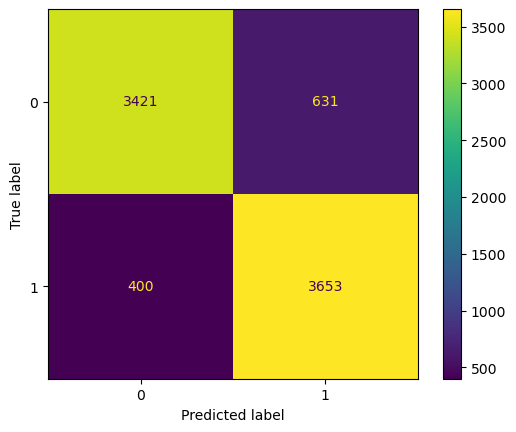

In [ ]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_model, X_test_mm, y_test);

Decesion Tree confusion matrix for our second question

* 3,421( ~84.42 %) games were correctly classified for games won,


* 3,653(~90.13%) games were correctly classified for matches lost.

---
# XGBoosting

In [ ]:
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_rem, y_rem)

# Store accuracy scores
XGB_model_rem_unsc_obj = XGB_model.score(X_rem, y_rem)
XGB_model_test_unsc_obj = XGB_model.score(X_test, y_test)

# Score the model 
print("---Unscaled data---")
print(f"Remainder Accuracy: {XGB_model_rem_unsc_obj}")
print(f"Test Accuracy: {XGB_model_test_unsc_obj}")

---Unscaled data---
Remainder Accuracy: 0.8857945390410661
Test Accuracy: 0.8709438618136952


In [ ]:
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_train, y_train)

# Store accuracy scores
XGB_model_train_unsc = XGB_model.score(X_train, y_train)
XGB_model_val_unsc = XGB_model.score(X_val, y_val)

# Score the model 
print("---Unscaled data---")
print(f"Train Accuracy: {XGB_model_train_unsc}")
print(f"Test Accuracy: {XGB_model_val_unsc}")

---Unscaled data---
Train Accuracy: 0.8859287342777366
Test Accuracy: 0.8798083901872551


In [ ]:
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_train_mm, y_train)

# Store accuracy scores
XGB_model_train_mm_obj = XGB_model.score(X_train_mm, y_train)
XGB_model_val_mm_obj = XGB_model.score(X_validation_mm, y_val)

# Score the model 
print("---MinMax Scaler data---")
print(f"Train Accuracy: {XGB_model_train_mm_obj}")
print(f"Test Accuracy: {XGB_model_val_mm_obj}")

---MinMax Scaler data---
Train Accuracy: 0.8859287342777366
Test Accuracy: 0.8798083901872551


In [ ]:
# Bulidng parameter and finding hyperparameter for our XGBoost
XGB_model = XGBClassifier(n_jobs=-1)

param_grid = {'n_estimators': np.arange(1, 200, 10), 'max_depth': np.arange(1, 10)}
grid_xgb = GridSearchCV(XGB_model, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(X_rem_mm, y_rem)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [ ]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"]
})

results_df.head()

,n_estimators,max_depth,mean_score
0,1,1,0.849018
1,11,1,0.867461
2,21,1,0.868245
3,31,1,0.869290
4,41,1,0.869965


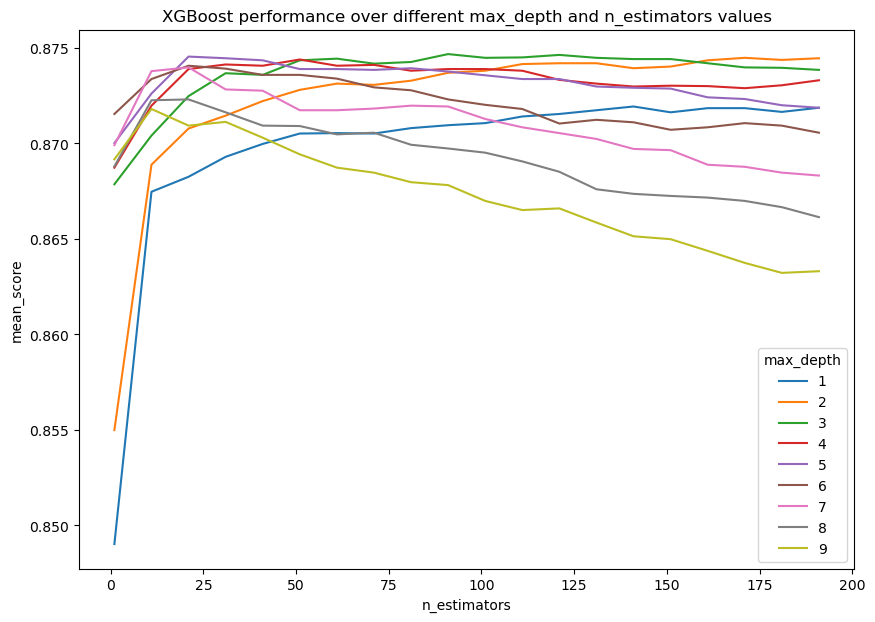

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.title("XGBoost performance over different max_depth and n_estimators values")
plt.show()

In [ ]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=91, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

---
Again same as our first XGBoost model here as well `max_depth=2` is best point to choose to optimize our model, based on above graph.

---

In [ ]:
# Instantiate the model 
XGB_model = XGBClassifier(max_depth=2, random_state=1,)

# Fit the model 
XGB_model.fit(X_rem_mm, y_rem)

# Store accuracy scores
XGB_model_rem_opt_obj = XGB_model.score(X_rem_mm, y_rem)
XGB_model_test_opt_obj = XGB_model.score(X_test_mm, y_test)

# Score the model 
print("---Optimized data---")
print(f"Remainder Accuracy: {XGB_model_rem_opt_obj}")
print(f"Test Accuracy: {XGB_model_test_opt_obj}")

---Optimized data---
Remainder Accuracy: 0.875168749727823
Test Accuracy: 0.8736582356570018


---
### Confusion Matrix for our XGBoost Model

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = XGB_model.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3453,599
True Defeat,425,3628


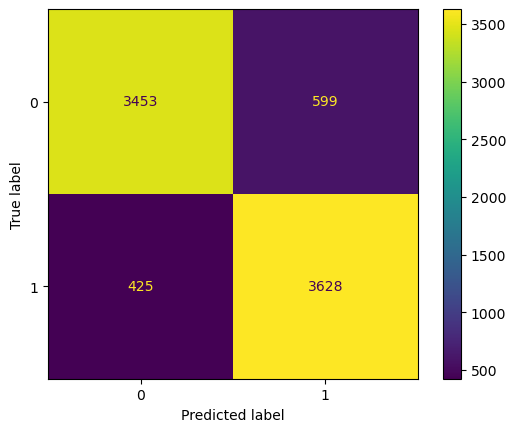

In [ ]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(XGB_model, X_test_mm, y_test);

XGBoost confusion matrix for our second question

* 3,453( ~85.21 %) games were correctly classified for games won,


* 3,628(~89.51%) games were correctly classified for matches lost.

---
## Side Feature

---
As mentioned ealier in the report we have two sides within the game's nao, Blue side and Red side. During our analysis we came across very intresting points, based on the result below we found in our data that the Blue side tends to win more games compared to the Red side. 

First of, we will examine the numbers and plot the results, then we will go more into details;

---

In [ ]:
# Total wins and loses in each side
df_two['side'].value_counts()

0    27017
1    27014
Name: side, dtype: int64

In [ ]:
# Total win breakdown based on the side
blue_side = df_two.loc[df_two['result'] == 1, ['side','result']].value_counts()
blue_side

side  result
1     1         14197
0     1         12822
dtype: int64

In [ ]:
# Total lsoe breakdown based on the side
red_side = df_two.loc[df_two['result'] == 0, ['side','result']].value_counts()
red_side

side  result
0     0         14195
1     0         12817
dtype: int64

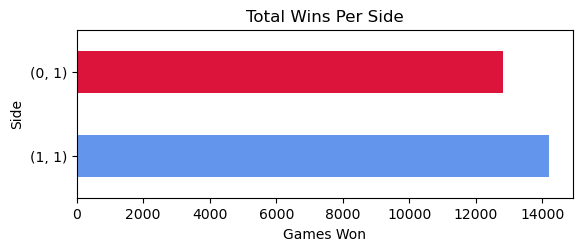

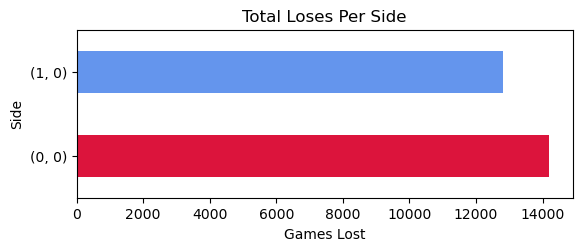

In [ ]:

# Plot for wins per side
plt.subplot(2, 1, 1)
blue_side.plot(kind ='barh',color=("cornflowerblue", "crimson"))
plt.title('Total Wins Per Side')
plt.xlabel('Games Won')
plt.ylabel('Side')
plt.show()

plt.subplot(2, 1, 2)
red_side.plot(kind ='barh',color=("crimson","cornflowerblue"))
plt.title('Total Loses Per Side')
plt.xlabel('Games Lost')
plt.ylabel('Side')
plt.show()


---
Now that we have plot the wins and loses per side, we can have better understanding and clear vision on why and how the Blue side's performance tends to be better. 

| side | Games Won | Games Lost | Win Percentage | Lose Percentage |
| - | - | - | - | - |
| Blue | 14,197 | 12,817 | 52.55% | 47.44% |
| Red | 12,822 | 14,195 |47.45% | 52.54% |


Aaccording to our data and the above graphs, we can confidently say that Blue side has more advantages, why? one of the reasons we concluded is that the layout of the map is different, and results easier to gank top side from blue side than red side. If you are in the red team and you would like to do the same thing, you'd need to go to blue side jungle and that is the big risk to take. Another reason is that on blue side you do have easier access to dragons which is a very important early game resource for the team. Lastly, another advantage of blue side is you always have the first champion pick, therefore the blue side can pick strongest champion in this patch, which ultimately works on their benefit.



---

---
## Players Kills and Assists 

---
So far we have been talking about economics (gold) and objectives of the game. Going forward, we will analyze these previously mentioned game objectives more in detail. 

Beforehand let's also have quick look into PvP, however we are not going in depth on this detail as many factors can affect this subject: if the player is a rookie, or if a player has Faker (Best Mid Laner) in their team would give them big advantage or even if players of one team have been playing in same team for the longest time, and that can result in better synergy and possibly better results. We are exposing this detail for the enrichment of our report. 

That being said, please see below the amount of the kills and assits each team would have, and then the a comparison of the results of the game based on Kills and assists.

---

In [ ]:
# Sum of the stats for winning team
Winner = df_two.loc[df_two['result'] == 1, ['kills','assists']]
Winner.sum()

kills       529549
assists    1199430
dtype: int64

In [ ]:
# Sum of the stats for losing team
Loser = df_two.loc[df_two['result'] == 0, ['kills','assists']]
Loser.sum()

kills      252472
assists    540496
dtype: int64

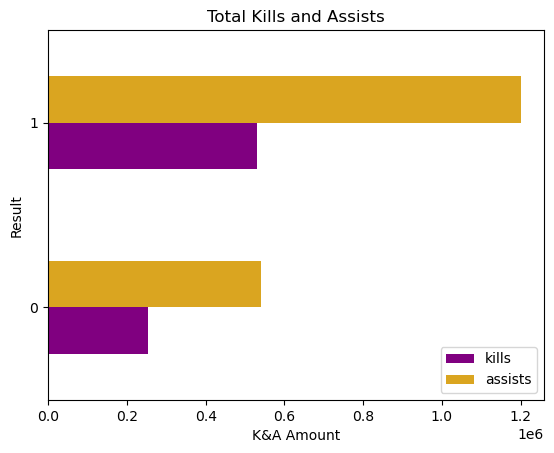

In [ ]:
# plot stats for both team
df = df_two.groupby(['result'])['kills','assists'].sum(['kills','assists','result'])
df.plot(kind ='barh',color=("purple", "goldenrod"))
plt.title('Total Kills and Assists')
plt.xlabel('K&A Amount')
plt.ylabel('Result')
plt.show()

---
Wow such a impressive results, we were not excpecting to see such high numbers in assist for winning team, we were actually expecting number of kills to be higher.

| Result | Kills | Assists |
| - | - | - |
| Victory | 529,549 | 1,199,430 |
| Defeat | 252,472 | 540,496 |

This lead us to conclude that it does makes sense to have an assistant for their teammates within a game, and this would result (in addition to killing the opponent) in gold, that would be received by the teammate who helped to execute the plan.

From a personal standpoint, I have been playing this game for a decade and never realized the importance of assits until this very  moment; as a matter of the fact, the majority of players do not care about assists, only the kill. We'll keep this newly found and important information in mind and use it for our later observations.

---

---
## Dragons


---
As previously mentioned, there are 5 types of dragons or drakes `Clouds`, `Hextech`, `Infernal`, `Mountain` and `Ocean` drakes. First dragon spawns 5 minutes after the game starts; after the dragn is slained 5 minutes later anotehr will respawn, once one of the two team slains 4 dragons, **Elder Dragon** will spawn next which is one the strongest buff in the game and once taken it kind of make it nearly impossible to fight the team who has it. This buffs gives the ability of excuting opponest  that has less than 25% of their tottal health.

Please note that Riot Games has decided to remove Chemtech drakes duo as of anuary 24th 2022 due to criticism received from the players. It is for this reason that we have decided to leave it outside of our analysis.

We have briefly spoken about dragons and elder dragons, let's see and compare, which type of dragon is most prompt to winning.

---

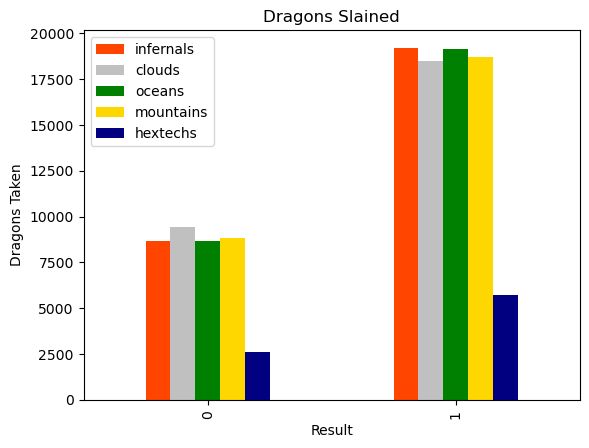

In [ ]:
# Plot the dragons type
df_dragons = df_two.groupby(['result'])['infernals','clouds','oceans','mountains',
                                        'hextechs'].sum(['infernals','clouds','oceans','mountains','hextechs','result'])
df_dragons.plot(kind ='bar',color=("orangered","silver","green","gold","navy"))
plt.title('Dragons Slained')
plt.xlabel('Result')
plt.ylabel('Dragons Taken')
plt.show()

---
The above graph shows a perfect distribution of the amount dragons slained between the winning and the losing teams. We can confidently say how importat this feature is based on amount of dragons winner team has slained, and we can see Infernal and Ocean are more dominant compared to the other three (3). 

---

--- 
## Dragons vs Rift Herald

---
Next we have comparison of Rift Herald and Dragons, both are very important in early to mid stages of the game. Dragons give you permanant buffs for the entire game once slained and rift herald you can use it to try to destroy a tower/towers and get more team gold.

We will showcase by plot the amount of dragon and rift herald taken between winner and loser teams;

---

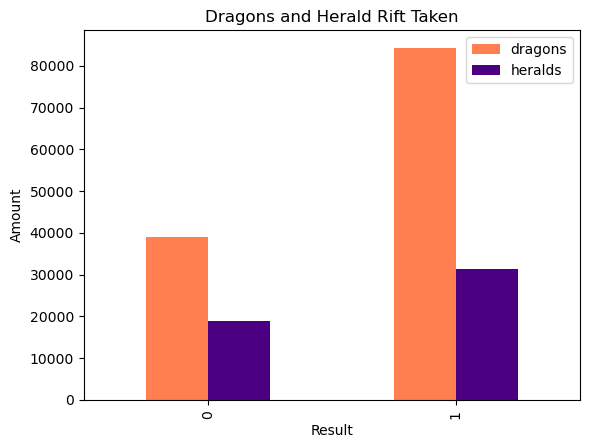

In [ ]:
# Plot Dragons vs Rift Herald
df = df_two.groupby(['result'])['dragons','heralds'].sum(['dragons','heralds','result'])
df.plot(kind ='bar', color=("coral","indigo"))
plt.title('Dragons and Herald Rift Taken')
plt.xlabel('Result')
plt.ylabel('Amount')
plt.show()

---
As suspected, Dragons are more important than Rifts as their effect stay for rest of the game and give a player and its team major advantages.

Rifts are temporary and once summoned they can be killed, and sometimes the opposite team can kill rift immediately after it is summoned before start damaging the turrets.

We can conclude that dragons are more prompt to help the team win and consequently, are more important.

---

---
# Barons & Elder Dragon

---
This one is the tough point, as both are important and strogest buffs in the game. We will plot them and see the results so we can talk about this more in detail.

---

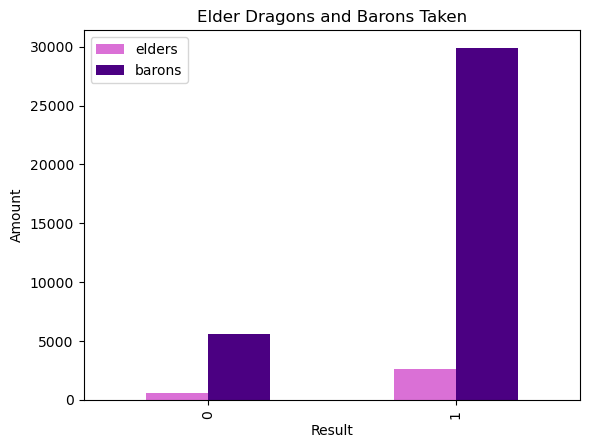

In [ ]:
# Plot the result for barons and elder dragon
BaEd_df = df_two.groupby(['result'])['elders','barons'].sum(['elders','barons','result'])
BaEd_df.plot(kind ='bar', color=("orchid","indigo"))
plt.title('Elder Dragons and Barons Taken')
plt.xlabel('Result')
plt.ylabel('Amount')
plt.show()

---
Well, we can see that the amount of barons taken by the winner team is, by far, more than Elder dragon. This result makes sense and is somewhat unfair for us to run this compare of these two, as baron spawn at 20 minutes into game, but elder dragon only spawn once one of the two team have slained 4 dragon. 

---

---
**Summarizing our model performances**

In [ ]:
unscaled = [base_logreg_unsc_rem,DT_model_rem_unscb,XGB_model_rem_unsc,OBJ_rem_unsc,DT_model_rem_unsc,XGB_model_rem_unsc_obj]
standard_MinMax = [Validated_logreg_ss_train_acc,DT_model_train_ss,XGB_model_train_ss,Validated_logreg_mm_train_acc,DT_model_train_mm,XGB_model_train_mm_obj]
optimazed = [Validated_logreg_opt_rem_acc,DT_model_rem_optg,XGB_model_rem_opt,Validated_logreg_opt_rem_acc_obj,DT_model_rem_opt,XGB_model_rem_opt_obj]

unscaled_t = [base_logreg_unsc_test,DT_model_test_unscb,XGB_model_test_unsc,OBJ_test_unsc,DT_model_test_unsc,XGB_model_test_unsc_obj]
standard_t = [Validated_logreg_ss_train_acc,DT_model_test_ss,XGB_model_val_ss,Validated_logreg_mm_val_acc,DT_model_val_mm,XGB_model_val_mm_obj]
optimazed_t = [Validated_logreg_opt_test_acc,DT_model_test_optg,XGB_model_test_opt,Validated_logreg_opt_test_acc_obj,DT_model_test_opt,XGB_model_test_opt_obj]

rows = ['Logistic Regression Gold/EXP@15min', 'Decision Tree Classifier Gold/EXP@15min','XGBoost Gold/EXP@15min','Logistic Regression OBJ','Decision Tree Classifier OBJ','XGBoost OBJ']

model_summary = pd.DataFrame(list(zip(unscaled, standard_MinMax, optimazed, unscaled_t, standard_t, optimazed_t)),
                             index=rows,
                             columns=pd.MultiIndex.from_product([['TRAIN DATA','TEST DATA'],
                                                                 ['Unscaled data', 'Scaled data','Optimized data']]))

model_summary

TRAIN DATA              \
                                        Unscaled data Scaled data   
Logistic Regression Gold/EXP@15min           0.652201    0.707098   
Decision Tree Classifier Gold/EXP@15min      0.694726    0.721316   
XGBoost Gold/EXP@15min                       0.762466    0.774214   
Logistic Regression OBJ                      0.867548    0.865768   
Decision Tree Classifier OBJ                 0.927601    0.872198   
XGBoost OBJ                                  0.885795    0.885929   

                                                           TEST DATA  \
                                        Optimized data Unscaled data   
Logistic Regression Gold/EXP@15min            0.706071      0.655645   
Decision Tree Classifier Gold/EXP@15min       0.716065      0.692782   
XGBoost Gold/EXP@15min                        0.711231      0.695990   
Logistic Regression OBJ                       0.867439      0.866379   
Decision Tree Classifier OBJ                  0.873274      0.827020   
XGBoost OBJ                                   0.875169      0.870944   

                                                                    
                                        Scaled data Optimized data  
Logistic Regression Gold/EXP@15min         0.707098       0.700432  
Decision Tree Classifier Gold/EXP@15min    0.693715       0.691548  
XGBoost Gold/EXP@15min                     0.696618       0.699692  
Logistic Regression OBJ                    0.874147       0.866009  
Decision Tree Classifier OBJ               0.877341       0.872795  
XGBoost OBJ                                0.879808       0.873658

---
### Summary Of Our Report

We have included Train and Test accuracy of all our models in the above table, let's also include the result of confusion matrix per model as well so we can go see them all in one picture and figure out which model performed well.

Results of the confusion matrixes for our 2 primery problems are as shown below:

1. Can we predict the result of the game within the first 15 minutes based on the amount of gold and XP earned by the team? 


2. How are the secondary objectives able to alter the dynamic of a game and change the potential game result?

**Logistic Regression Gold/EXP@15min**

* 2,874( ~70.92 %) games were correctly classified for games won


* 2,803(~69.15%) games were correctly classified for matches lost.

**Decision Tree Classifier Gold/EXP@15min**

* 2,642( ~65.20 %) games were correctly classified for games won


* 2,963(~73.10%) games were correctly classified for matches lost.

**XGBoost Gold/EXP@15min**	

* 2,880( ~71.07 %) games were correctly classified for games won

* 2,777(~68.51%) games were correctly classified for matches lost 

**Logistic Regression OBJ**

* 3,454( ~85.24 %) games were correctly classified for games won,


* 3,553(~87.66%) games were correctly classified for matches lost.

**Decision Tree Classifier OBJ**

* 3,421( ~84.42 %) games were correctly classified for games won,

* 3,653(~90.13%) games were correctly classified for matches lost.

**XGBoost OBJ**

* 3,453( ~85.21 %) games were correctly classified for games won,


* 3,628(~89.51%) games were correctly classified for matches lost.


Now that we have our numbers summarized, we will proceed to conclude. 








---
## **Conclusion**

---
In summary, our main objective within our project has been to respond to the questions or problems we stated herein: can we predict the result of the game within the first 15 minutes based on the amount of gold and XP earned by a team? How are the secondary objectives able to alter the dynamic of a game and change the potential game result? 

For this matter, we conclude with the following comparison of the models' performance with respect to the data given. For our first primary problem, the test accuracy for optimized data varied from ~69.9 to ~70%; however, once we evaluated our models, Logistic Regression and XGBoost performed better compared to Decesion Tree, and is my observation that Logistic Regression outshines XGBoost in this case, with a slightly more accurate result. 

Following the second question within our project, our models demonstrate that XGBoost has better train and test accuracy, in comparison to the other two models. With respect to the evaluation, it also performs better than the other two models with nearly ~86 and ~ 90% correctly classified matches for wins and loses respectively. 

As we were able to choose and find which model performs better in each problem stated, we can narrow down other remarkable details that are essential to our report. 

- Such as how the blue side is more important than the red side and has higher win percentage


- Importance of dragons and the correlation they have toward winning


- Importance of assists and amount of gold it can bring to your teammates

---

---
### Sources:

(1) - https://oracleselixir.com/tools/downloads

(2) - https://www.unrankedsmurfs.com/blog/lol-blue-side-advantage

(3) - https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

(4) - https://activeplayer.io/league-of-legends/#:~:text=League%20of%20Legends%20has%20a,10%20%E2%80%93%2011%20active%20players%20daily.

(5) - https://playercounter.com/league-of-legends/

(6) - https://www.lolfinity.com/guide-to-league-of-legends-objectives-maps/

(7) - https://dotesports.com/league-of-legends/news/league-of-legends-number-of-players-14488

(8) - https://torontoguardian.com/2022/07/growing-popularity-of-esports/#:~:text=Global%20viewership%20has%20been%20experiencing,2021%2C%20it%20crossed%20500%20million.

(9) - https://www.statista.com/

(10) - https://www.leagueoflegends.com/en-us/how-to-play/